# 1. Vertebrate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import rcParams
import warnings
import scipy
warnings.filterwarnings('ignore')

In [2]:
sns.set_style("whitegrid")
rcParams['figure.figsize']  = 19,7
rcParams['lines.linewidth'] = 2.8
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['axes.titlesize']  = 14
rcParams['axes.titleweight']  = 550
rcParams['axes.grid'] = True
rcParams['grid.alpha'] = 0.19
plt.rc('axes',axisbelow=True)
plt.rc('axes.spines',top=False,bottom=False,left=False,right=False)
pd.set_option('display.max_columns',100)
palette=['#F5634A', '#FF9C5B', '#FAD089','#3B8183']

In [3]:
vertebrate_df = pd.read_excel('vertebrate.xlsx',engine='openpyxl')

In [4]:
vertebrate_df.drop(['Class'],axis=1)

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,human,1,1,0,0,1,0
1,python,0,0,0,0,0,1
2,salmon,0,0,1,0,0,0
3,whale,1,1,1,0,0,0
4,frog,0,0,1,0,1,1
5,komodo,0,0,0,0,1,0
6,bat,1,1,0,1,1,1
7,pigeon,1,0,0,1,1,0
8,cat,1,1,0,0,1,0
9,leopard shark,0,1,1,0,0,0


In [5]:
vertebrate_df.Class.value_counts()

mammals       5
reptiles      3
fishes        3
amphibians    2
birds         2
Name: Class, dtype: int64

Since reptiles until birds can be categorised into non-mammals, we will rename them

In [6]:
vertebrate_df['Class'] = vertebrate_df.Class.apply(lambda x: 1 if x=='mammals' else 0)

In [7]:
vertebrate_df.isna().sum()

Name                0
Warm-blooded        0
Gives Birth         0
Aquatic Creature    0
Aerial Creature     0
Has Legs            0
Hibernates          0
Class               0
dtype: int64

In [8]:
vertebrate_df.duplicated().sum()

0

In [9]:
vertebrate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              15 non-null     object
 1   Warm-blooded      15 non-null     int64 
 2   Gives Birth       15 non-null     int64 
 3   Aquatic Creature  15 non-null     int64 
 4   Aerial Creature   15 non-null     int64 
 5   Has Legs          15 non-null     int64 
 6   Hibernates        15 non-null     int64 
 7   Class             15 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 1.1+ KB


Seems there is no problem in the data. Hence, we can go further to do analysis

## 1.1 The outlook of binary variables

( `Warm-blooded, Gives Birth, Aquatic Creature, Aerial Creature, Has Legs, Hibernates` )

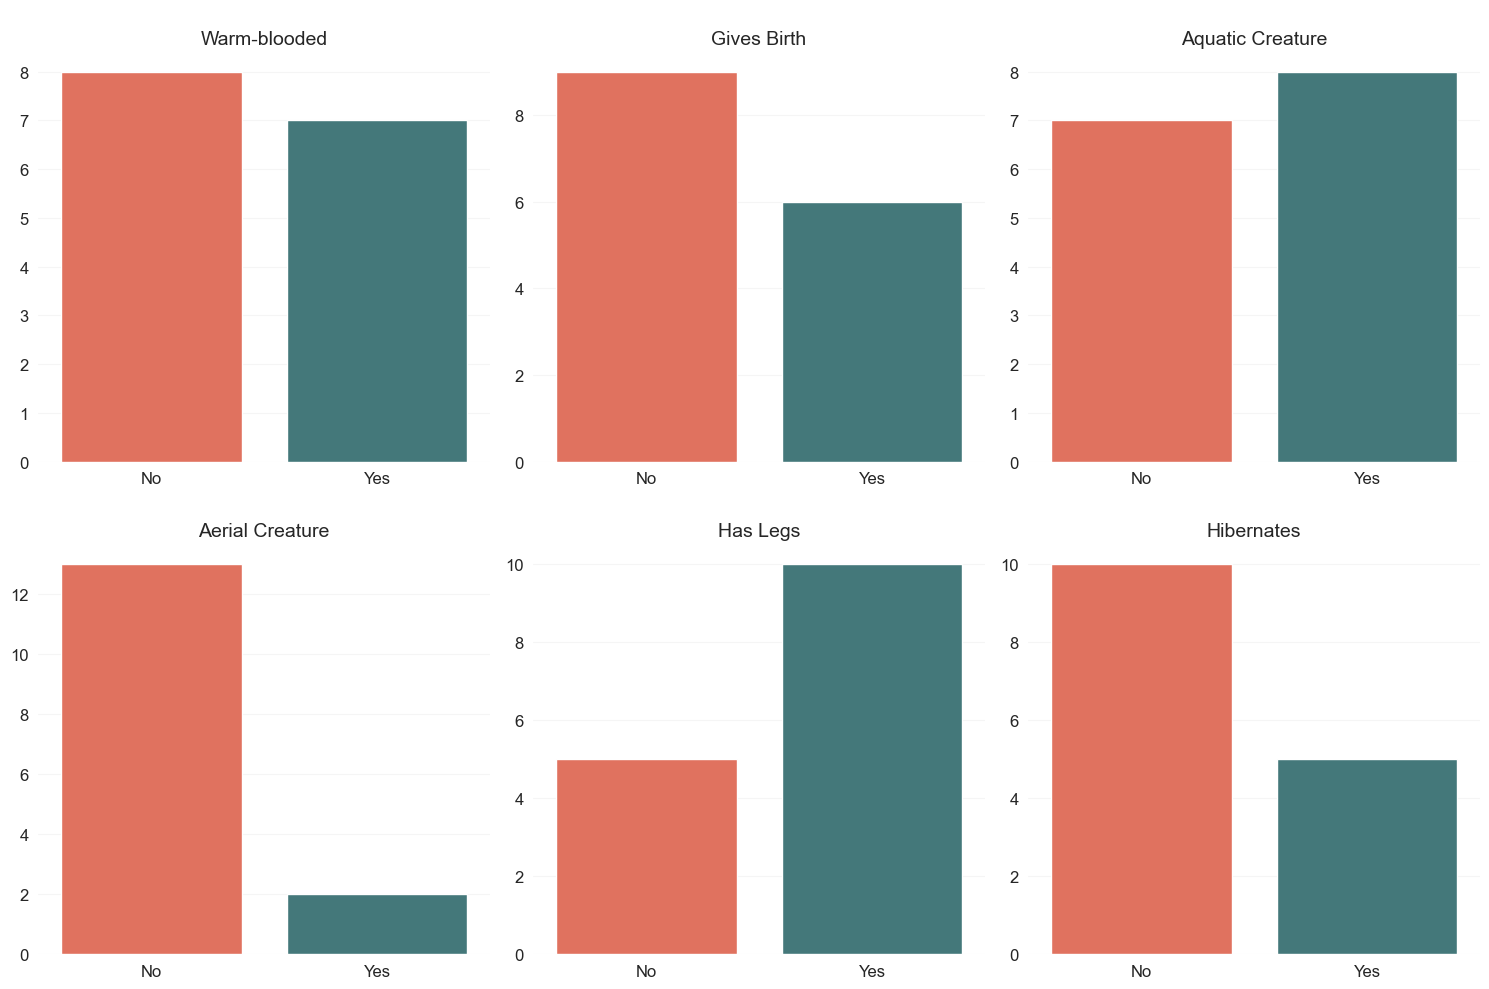

In [10]:
# Set up the subplot with multiple axes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Create a boxplot for each column in the dataset
for i, column in enumerate(vertebrate_df.columns[1:-1]):
    sns.countplot(x=vertebrate_df[column], ax=axs[i//3, i%3], palette=palette[::len(palette)-1])
    axs[i//3, i%3].set_title('\n'+column)
    axs[i//3, i%3].set_xlabel('')
    axs[i//3, i%3].set_ylabel('')
    axs[i//3, i%3].set_xticklabels(['No','Yes'])
    

# Adjust the layout of the subplot
plt.tight_layout()
plt.show()

The given dataset provides information on 15 distinct animals and their characteristics, encompassing six binary variables: `Warm-blooded`, `Gives Birth`, `Aquatic Creature`, `Aerial Creature`, `Has Legs`, and `Hibernates`. According to the `Warm-blooded` variable, seven of the animals are warm-blooded while the remaining eight are cold-blooded. Among the warm-blooded animals, five give birth while the remaining two, namely the bat and pigeon, lay eggs. In contrast, of the eight cold-blooded animals, only two give birth while the remaining six lay eggs.

The `Aquatic Creature` variable reveals that six of the animals are aquatic, whereas the other nine are terrestrial. Out of the six aquatic creatures, four possess limbs while the other two, the eel and salmon, are limbless. Similarly, the `Aerial Creature` variable indicates that three of the animals are aerial, whereas the other twelve are terrestrial. Among the aerial creatures, the bat and pigeon possess legs, while the penguin is a flightless bird.

Moreover, the `Has Legs` variable signifies that ten of the animals have legs while the remaining five are limbless. Among the animals with legs, six are terrestrial, two are aquatic, and two are aerial. Finally, the `Hibernates` variable states that four of the animals hibernate while the remaining eleven do not. Notably, all the hibernating animals are terrestrial species

## 1.2 Correlation between binary variables

In [11]:
from typing import List
from math import sqrt

def phi_coefficient(table: List[List[int]]) -> float:
    a = table[0][0]
    b = table[0][1]
    c = table[1][0]
    d = table[1][1]
    
    numerator = (a*d) - (b*c)
    denominator = sqrt((a+b)*(c+d)*(a+c)*(b+d))
    
    phi = numerator / denominator
    
    return phi

In [12]:
from scipy.stats import chi2_contingency
from itertools import combinations


var_names = list(vertebrate_df.columns[1:])

# Generate all possible pairs of variable names
pairs = list(combinations(var_names, 2))
phi_vertebrate_df = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Phi Coefficient'])

# Calculate the Phi coefficient for each pair of variables using a loop
for pair in pairs:
    chi2, p, dof, expected = chi2_contingency(pd.crosstab(vertebrate_df[pair[0]], vertebrate_df[pair[1]]))
    phi_coeff = phi_coefficient(pd.crosstab(vertebrate_df[pair[0]], vertebrate_df[pair[1]]).values)
    phi_vertebrate_df = phi_vertebrate_df.append({'Variable 1': pair[0], 'Variable 2': pair[1], 'Phi Coefficient': phi_coeff}, ignore_index=True)

In [13]:
phi_vertebrate_df

,Variable 1,Variable 2,Phi Coefficient
0,Warm-blooded,Gives Birth,0.600099
1,Warm-blooded,Aquatic Creature,-0.464286
2,Warm-blooded,Aerial Creature,0.419314
3,Warm-blooded,Has Legs,0.377964
4,Warm-blooded,Hibernates,-0.094491
5,Warm-blooded,Class,0.755929
6,Gives Birth,Aquatic Creature,-0.327327
7,Gives Birth,Aerial Creature,0.080064
8,Gives Birth,Has Legs,0.000000
9,Gives Birth,Hibernates,0.000000


The pair of variables `Warm-blooded` and `Gives Birth` has a relatively high positive phi coefficient of 0.6, indicating a strong positive association between these two variables. This is not surprising as most mammals are both warm-blooded and give birth to their young.

The pair of variables `Warm-blooded` and `Aquatic Creature` has a negative phi coefficient of -0.46, indicating a moderate negative association between these two variables. This could be because most aquatic creatures, such as fish and whales, are cold-blooded and not warm-blooded.

The pair of variables `Warm-blooded` and `Aerial Creature` has a positive phi coefficient of 0.42, indicating a moderate positive association between these two variables. This is likely due to the fact that most birds and bats, which are aerial creatures, are warm-blooded.

The pair of variables `Warm-blooded` and `Has Legs` has a positive phi coefficient of 0.38, indicating a moderate positive association between these two variables. This is not surprising as most warm-blooded animals, such as mammals and birds, have legs.

The pair of variables `Gives Birth` and `Aquatic Creature` has a negative phi coefficient of -0.33, indicating a moderate negative association between these two variables. This could be because most aquatic creatures, such as fish and amphibians, do not give birth to their young but lay eggs instead.

The pair of variables `Aquatic Creature` and `Aerial Creature` has a negative phi coefficient of -0.42, indicating a moderate negative association between these two variables. This is not surprising as there are very few creatures that are both aquatic and aerial.

The pair of variables `Aquatic Creature` and `Has Legs` has a negative phi coefficient of -0.38, indicating a moderate negative association between these two variables. This is because most aquatic creatures, such as fish and dolphins, do not have legs.

The pair of variables `Aerial Creature` and `Has Legs` has a positive phi coefficient of 0.28, indicating a weak positive association between these two variables. This is because most aerial creatures, such as birds and bats, have legs.

The pair of variables `Has Legs` and `Hibernates` has a positive phi coefficient of 0.2, indicating a weak positive association between these two variables. This is because many animals that have legs, such as bears and squirrels, hibernate during the winter months.

## 1.3 What variables are instrumental in classifying the “Class” column? Explain and give a visualization!

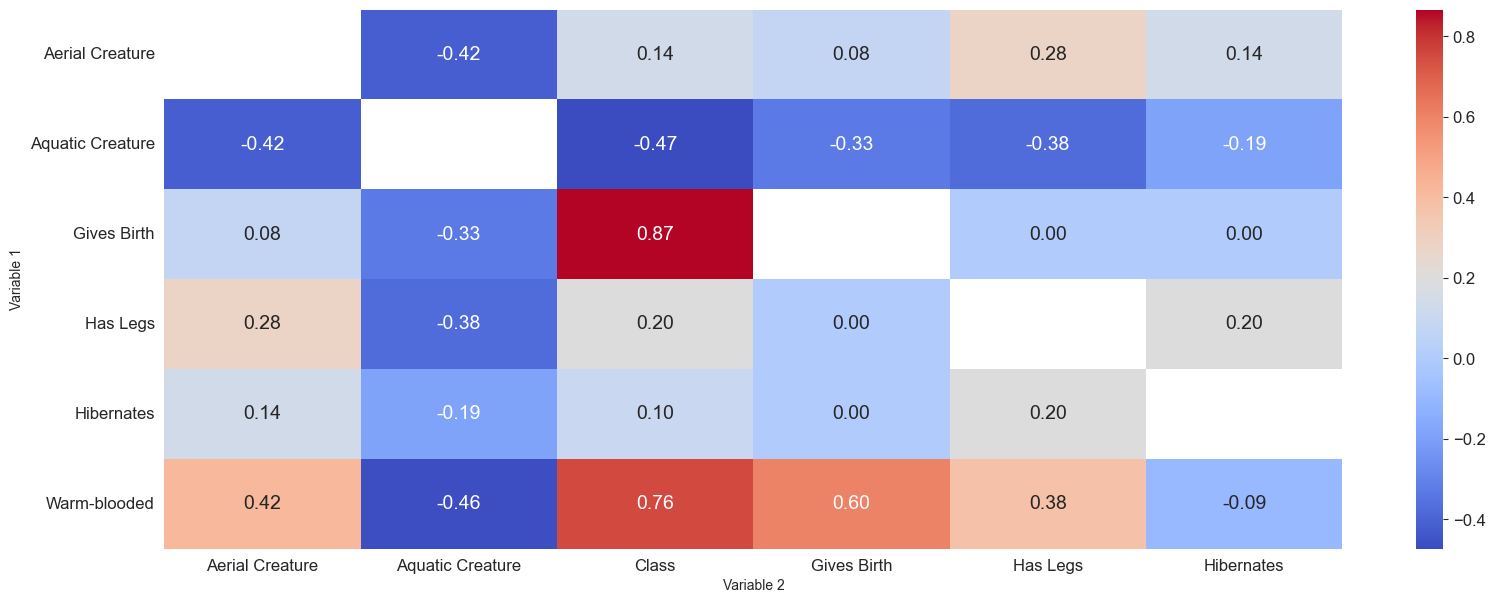

In [14]:
# Create a pivot table to reshape the dataframe for visualization
pivot = phi_vertebrate_df.pivot(index='Variable 1', columns='Variable 2', values='Phi Coefficient')
mask = np.zeros_like(pivot)
mask[np.triu_indices_from(mask)] = True

# Create a heatmap using seaborn
sns.heatmap(pivot.fillna(pivot.T), cmap='coolwarm', annot=True, fmt='.2f', annot_kws={"fontsize":14})

plt.show()

"Gives Birth": This variable has a Phi coefficient of 0.866025 with the "Class" column, indicating a strong positive association. This suggests that animals that give birth are likely to be classified as mammals.

"Warm-blooded": This variable has a Phi coefficient of 0.755929 with the "Class" column, indicating a strong positive association. This suggests that animals that are warm-blooded are likely to be classified as mammals.

"Aquatic Creature": This variable has a Phi coefficient of -0.472456 with the "Class" column, indicating a moderate negative association. This suggests that animals that are aquatic are more likely to be classified as non-mammals.

In [15]:
vertebrate_df

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,1
1,python,0,0,0,0,0,1,0
2,salmon,0,0,1,0,0,0,0
3,whale,1,1,1,0,0,0,1
4,frog,0,0,1,0,1,1,0
5,komodo,0,0,0,0,1,0,0
6,bat,1,1,0,1,1,1,1
7,pigeon,1,0,0,1,1,0,0
8,cat,1,1,0,0,1,0,1
9,leopard shark,0,1,1,0,0,0,0


# 2. Titanic Train

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('titanic_train.xlsx',engine='openpyxl')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2.1 Which features contain blank, null, or empty values? How we fixed them?

In [17]:
# to check the missing values

print("Missing attributes:")
data.isnull().sum()

Missing attributes:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
#cabin column has most NaN values so we fix it first
#we create a new column 'HasCabin' which has 1 if there is a cabin and 0 for NaN

def create_feat_has_cabin(df, colname):
    # if NA => 0 else 1
    def _is_nan(x):
        if isinstance(x, type(np.nan)):
            return 0
        return 1
        
    return df[colname].apply(_is_nan)
    
data['HasCabin'] = create_feat_has_cabin(data, 'Cabin')

In [19]:
#fill NA values of embarked column with 'S' (Southampton)

def fill_na_embarked(df, colname):
    
    return df[colname].fillna('S')
    
data['Embarked'] = fill_na_embarked(data, 'Embarked')

In [20]:
#fill missing values of Age column with random values centered around mean and standard deviation

mean = data['Age'].mean()
sd = data['Age'].std()
print(mean,sd)

29.69911764705882 14.526497332334042


In [21]:
#fill missing values by choosing random number between 16 and 43

def fill_na_age(df, colname):
    mean = df['Age'].mean()
    sd = df['Age'].std()
    def fill_empty(x):
        if np.isnan(x):
            return np.random.randint(mean-sd, mean+sd, ())
        return x
    return df[colname].apply(fill_empty).astype(int)
data['Age'] = fill_na_age(data, 'Age')

In [22]:
#check whether the missing values are fixed

data.isnull().sum()

#ignore missing value in Cabin since we have already created new column 'HasCabin'

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
HasCabin         0
dtype: int64

## 2.3 Can we reduce the number of columns?

In [23]:
#drop useless columns
#this is where we reduce number of columns 

drop_list = ['PassengerId', 'Cabin', 'Ticket', 'SibSp', 'Name']
titanic = data.drop(drop_list, axis=1)

In [24]:
#check correlation between cabin and fare

corrmat = titanic.corr()
corrmat

,Survived,Pclass,Age,Parch,Fare,HasCabin
Survived,1.000000,-0.338481,-0.064303,0.081629,0.257307,0.316912
Pclass,-0.338481,1.000000,-0.322159,0.018443,-0.549500,-0.725541
Age,-0.064303,-0.322159,1.000000,-0.169407,0.090305,0.226663
Parch,0.081629,0.018443,-0.169407,1.000000,0.216225,0.036987
Fare,0.257307,-0.549500,0.090305,0.216225,1.000000,0.482075
HasCabin,0.316912,-0.725541,0.226663,0.036987,0.482075,1.000000


## 2.4 Try to derive an additional column that represents marriage status.

In [25]:
#Derive an additional column that represent marriage status
import random

Marriage_Status = random.choices(
    population=['married','single','engaged','engaged', 'unknown'],
    k=data.shape[0]
)
data['Marriage_Status'] = Marriage_Status

In [26]:
#Print result of the new data of marriage status derivation
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Marriage_Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0,single
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,married
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,engaged
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,unknown
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,engaged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,0,single
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,1,single
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27,1,2,W./C. 6607,23.4500,NaN,S,0,engaged
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,1,single


## 2.5 Do we have a strong correlation between fare and cabin?

<AxesSubplot: >

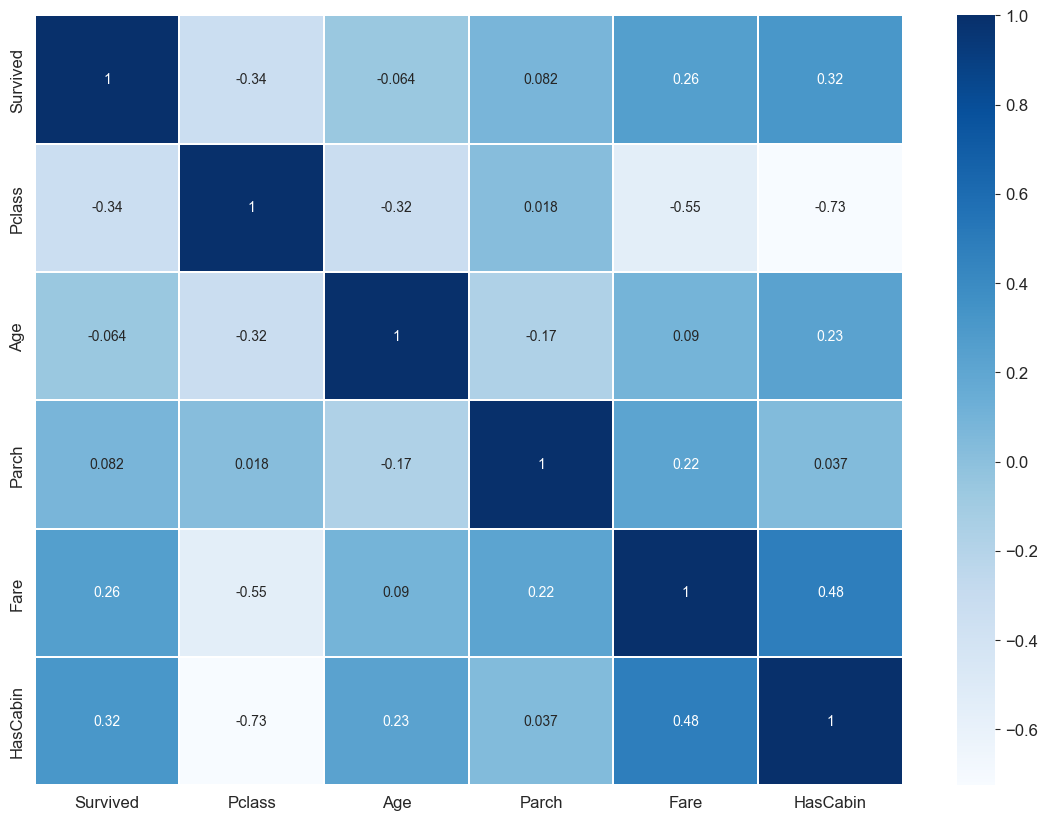

In [27]:
#visualization

import seaborn as sns
colormap = plt.cm.Blues
plt.figure(figsize=(14,10))
sns.heatmap(titanic.corr(), cmap=colormap, annot=True, linewidths=0.2)

#cabin and fare are highly positively correlated

## 2.6 What are the variables that are instrumental in explaining “Survived”? Give appropriate visualization!

In [28]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,HasCabin
PassengerId,1.000000,-0.005007,-0.035144,0.029630,-0.057527,-0.001652,0.012658,0.019919
Survived,-0.005007,1.000000,-0.338481,-0.064303,-0.035322,0.081629,0.257307,0.316912
Pclass,-0.035144,-0.338481,1.000000,-0.322159,0.083081,0.018443,-0.549500,-0.725541
Age,0.029630,-0.064303,-0.322159,1.000000,-0.219887,-0.169407,0.090305,0.226663
SibSp,-0.057527,-0.035322,0.083081,-0.219887,1.000000,0.414838,0.159651,-0.040460
Parch,-0.001652,0.081629,0.018443,-0.169407,0.414838,1.000000,0.216225,0.036987
Fare,0.012658,0.257307,-0.549500,0.090305,0.159651,0.216225,1.000000,0.482075
HasCabin,0.019919,0.316912,-0.725541,0.226663,-0.040460,0.036987,0.482075,1.000000


<AxesSubplot: >

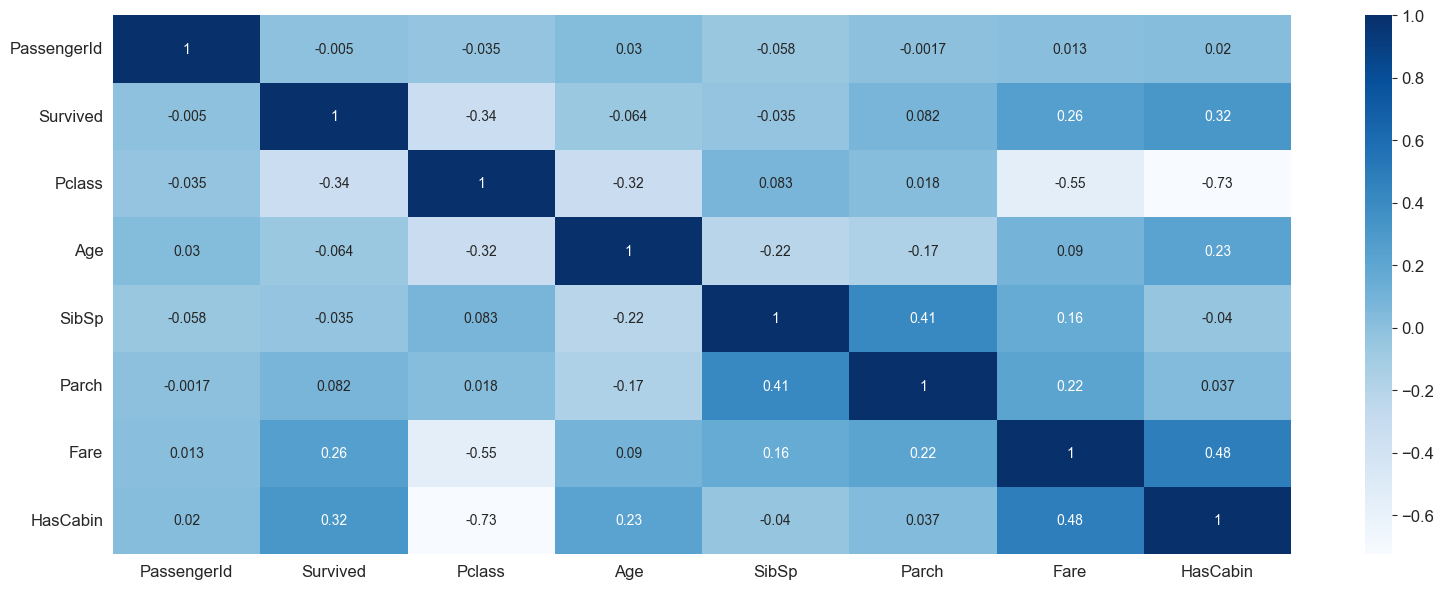

In [29]:
#Check what are variables that are instrumental in explaining 'Survived'
import seaborn as sns
data.corr()
sns.heatmap(data.corr(),annot=True,cmap='Blues')

Based on the heatmap, we can see that `Pclass` has the strongest negative correlation with `Survived`, followed by `Fare` with a moderately positive correlation. `Age`, `SibSp`, and `Parch` have weaker correlations with `Survived`.

# 3. Restaurant

In [30]:
restaurant_df = pd.read_excel('TA_restaurants_curated.xlsx', engine='openpyxl').iloc[:,1:]

In [31]:
restaurant_df.head()

,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


In [32]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125527 entries, 0 to 125526
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               125521 non-null  object 
 1   City               125527 non-null  object 
 2   Cuisine Style      94176 non-null   object 
 3   Ranking            115876 non-null  float64
 4   Rating             115897 non-null  float64
 5   Price Range        77672 non-null   object 
 6   Number of Reviews  108183 non-null  float64
 7   Reviews            115911 non-null  object 
 8   URL_TA             125527 non-null  object 
 9   ID_TA              125527 non-null  object 
dtypes: float64(3), object(7)
memory usage: 9.6+ MB


## 3.1 Summarize the data!

In [33]:
restaurant_df.describe()

,Ranking,Rating,Number of Reviews
count,115876.000000,115897.000000,108183.000000
mean,3657.463979,3.987441,125.184983
std,3706.255301,0.678814,310.833311
min,1.000000,-1.000000,2.000000
25%,965.000000,3.500000,9.000000
50%,2256.000000,4.000000,32.000000
75%,5237.000000,4.500000,114.000000
max,16444.000000,5.000000,16478.000000


The average ranking is 3,657, indicating that the items are relatively popular. The mean rating is 3.99 out of 5, with a standard deviation of 0.68, which suggests that the items are generally well-received with some variation in rating scores.

The number of reviews for the items ranges from 2 to 16,478, with an average of 125.19 reviews and a large standard deviation of 310.83, indicating a significant variation in the popularity of the items.

The minimum and maximum values for the ranking, rating, and number of reviews are 1 and 16,444, -1 and 5, and 2 and 16,478, respectively.

The dataset's median ranking is 2,256, median rating is 4, and median number of reviews is 32. The 25th percentile of ranking, rating, and number of reviews are 965, 3.5, and 9, respectively. The 75th percentile of ranking, rating, and number of reviews are 5,237, 4.5, and 114, respectively.

## 3.2 Which features contain blank, null, or empty values? Can we fix them? How?

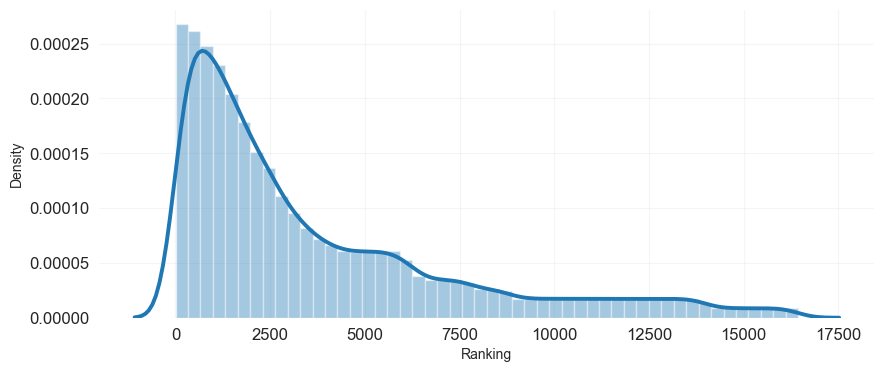

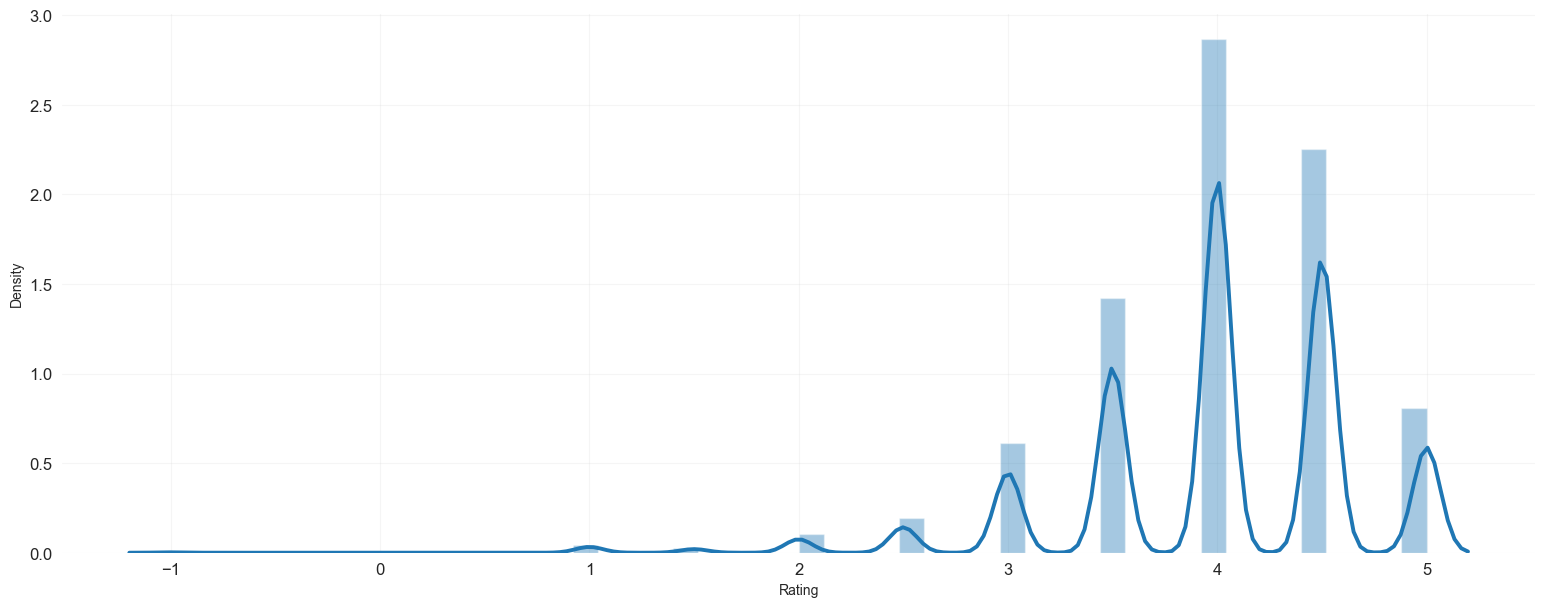

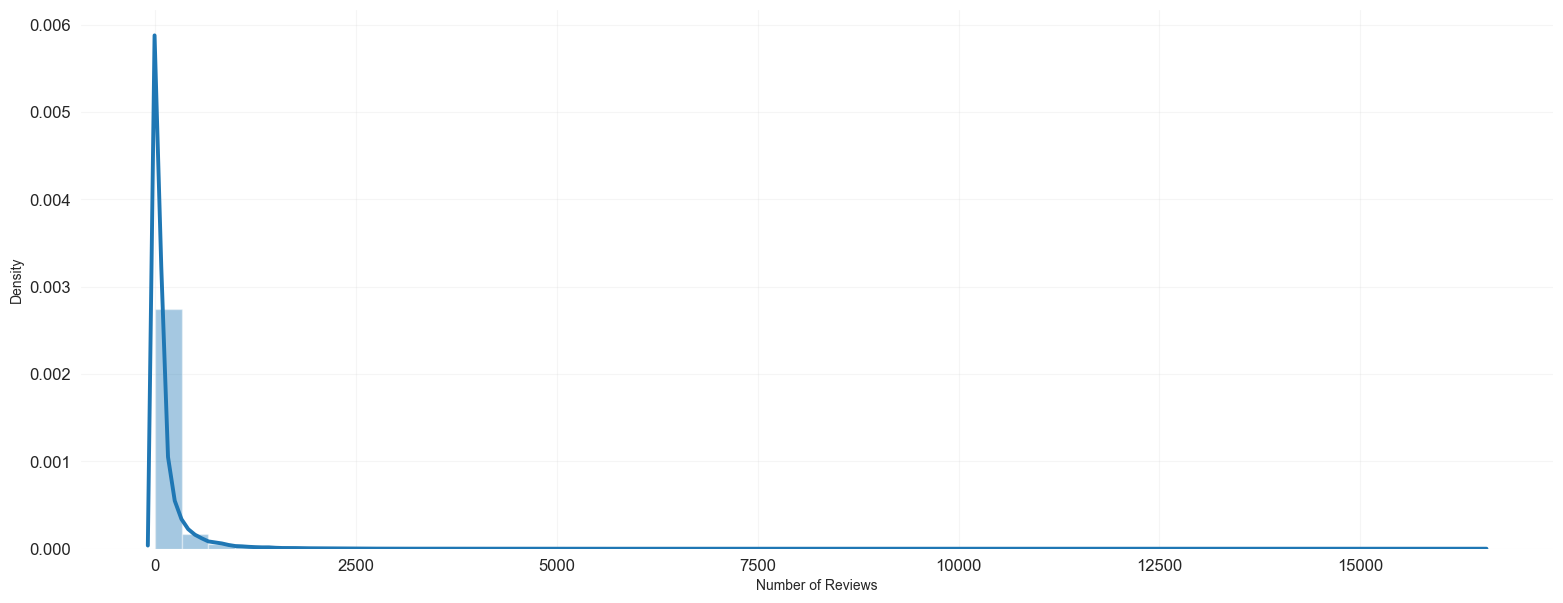

In [34]:
plt.figure(figsize=(10,4))
for i in ['Ranking','Rating','Number of Reviews']:
    sns.distplot(restaurant_df[i])
    plt.show()

In [35]:
restaurant_df.isna().sum()/restaurant_df.shape[0]*100

Name                  0.004780
City                  0.000000
Cuisine Style        24.975503
Ranking               7.688386
Rating                7.671656
Price Range          38.123272
Number of Reviews    13.816948
Reviews               7.660503
URL_TA                0.000000
ID_TA                 0.000000
dtype: float64

All columns are having missing values except `City`, `URL_TA`, and `ID_TA`

- For `Name`,`Ranking`,`Rating`,and `Reviews`, we can simply put them out from the dataset since it contains small number of missing values ( less than 10% )

In [36]:
restaurant_df.dropna(subset=['Name','Ranking','Rating','Reviews'],inplace=True)

In [37]:
restaurant_df.isna().sum()

Name                     0
City                     0
Cuisine Style        26779
Ranking                  0
Rating                   0
Price Range          40315
Number of Reviews     7593
Reviews                  0
URL_TA                   0
ID_TA                    0
dtype: int64

## 3.3 Do we have highly correlated columns?

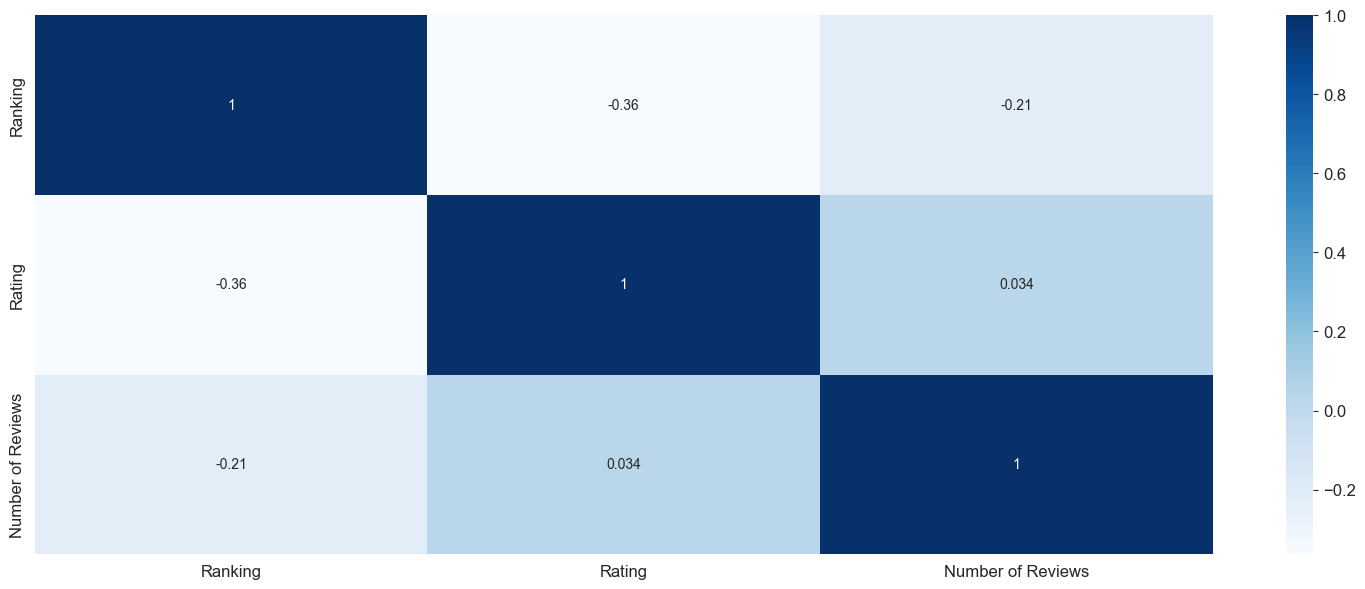

In [38]:
sns.heatmap(restaurant_df.corr(),cmap='Blues',annot=True)
plt.show()

No, we don't have highly correlated columns

## 3.4 Explain do we have balanced data set. Provide visualization! 

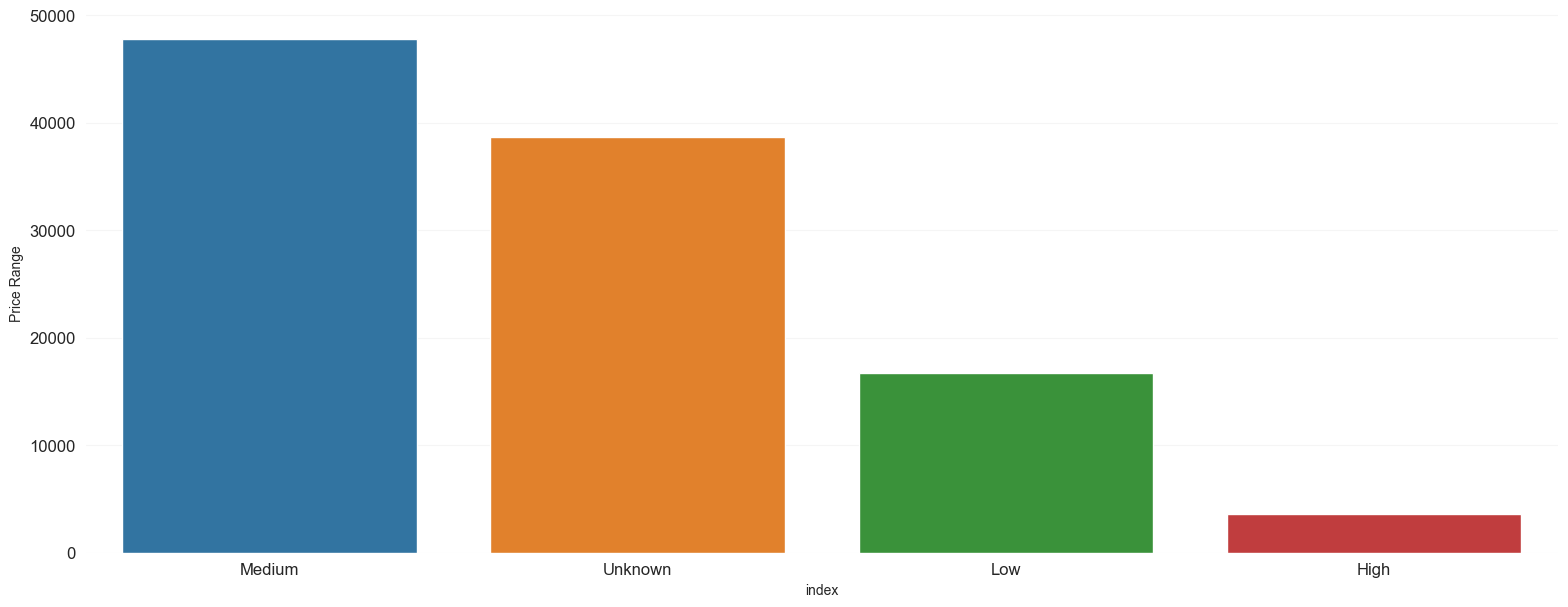

In [40]:
vfunc = np.vectorize(lambda x: map_dict[x])
map_dict = {
    '$$ - $$$': 'Medium', 
    '$$$$': 'High', 
    '$': 'Low', 
    np.nan: 'Unknown'
}
restaurant_df['Price Range'] = pd.Series(vfunc(restaurant_df['Price Range']))
# Use numpy vectorize function to apply the mapping

sns.barplot(x='index',y='Price Range',data=restaurant_df['Price Range'].value_counts().reset_index())
plt.show()

In [41]:
restaurant_df['Price Range'].value_counts().reset_index()

,index,Price Range
0,Medium,47768
1,Unknown,38683
2,Low,16737
3,High,3580


No, we don't. The data seems to be unbalanced since the value of low and high relatively very small compared to the medium

## 3.5 Summarize the cuisine style based on city, rating, and price range!

In [42]:
# Define the columns to group by
group_cols = ['City', 'Rating', 'Price Range']

# Loop through each group and count the number of restaurants
for group_name, group_restaurant_df in restaurant_df.groupby(group_cols):
    # Get the cuisine styles for this group and count their frequency
    cuisine_styles = group_restaurant_df['Cuisine Style'].str.strip("[]").str.replace("'", "").str.split(", ")
    cuisine_styles = cuisine_styles.explode().value_counts().sort_values(ascending=False)
    # Print the result for each cuisine style in this group
    for cuisine, count in cuisine_styles.items():
        print(group_name, cuisine, count)


('Amsterdam', 1.0, 'Medium') European 1
('Amsterdam', 1.0, 'Unknown') Fast Food 1
('Amsterdam', 1.0, 'Unknown') Soups 1
('Amsterdam', 1.0, 'Unknown') Vegetarian Friendly 1
('Amsterdam', 1.0, 'Unknown') Vegan Options 1
('Amsterdam', 1.5, 'Medium') Spanish 1
('Amsterdam', 1.5, 'Medium') European 1
('Amsterdam', 1.5, 'Unknown') Italian 1
('Amsterdam', 1.5, 'Unknown') Pizza 1
('Amsterdam', 1.5, 'Unknown') European 1
('Amsterdam', 2.0, 'Low') Seafood 1
('Amsterdam', 2.0, 'Medium') European 3
('Amsterdam', 2.0, 'Medium') Asian 2
('Amsterdam', 2.0, 'Medium') Chinese 1
('Amsterdam', 2.0, 'Medium') Indian 1
('Amsterdam', 2.0, 'Medium') Italian 1
('Amsterdam', 2.0, 'Medium') Pizza 1
('Amsterdam', 2.0, 'Medium') Vegetarian Friendly 1
('Amsterdam', 2.0, 'Medium') Steakhouse 1
('Amsterdam', 2.0, 'Unknown') Pizza 2
('Amsterdam', 2.0, 'Unknown') Cafe 2
('Amsterdam', 2.0, 'Unknown') Argentinean 2
('Amsterdam', 2.0, 'Unknown') South American 2
('Amsterdam', 2.0, 'Unknown') Mexican 1
('Amsterdam', 2.0, 

('Barcelona', 3.0, 'Medium') Spanish 76
('Barcelona', 3.0, 'Medium') Mediterranean 60
('Barcelona', 3.0, 'Medium') European 27
('Barcelona', 3.0, 'Medium') Seafood 12
('Barcelona', 3.0, 'Medium') Italian 12
('Barcelona', 3.0, 'Medium') Vegetarian Friendly 11
('Barcelona', 3.0, 'Medium') Pizza 10
('Barcelona', 3.0, 'Medium') Fast Food 10
('Barcelona', 3.0, 'Medium') Japanese 8
('Barcelona', 3.0, 'Medium') Sushi 7
('Barcelona', 3.0, 'Medium') Cafe 6
('Barcelona', 3.0, 'Medium') American 5
('Barcelona', 3.0, 'Medium') Pub 4
('Barcelona', 3.0, 'Medium') Indian 4
('Barcelona', 3.0, 'Medium') International 4
('Barcelona', 3.0, 'Medium') Bar 4
('Barcelona', 3.0, 'Medium') South American 4
('Barcelona', 3.0, 'Medium') Turkish 3
('Barcelona', 3.0, 'Medium') Chinese 3
('Barcelona', 3.0, 'Medium') Middle Eastern 3
('Barcelona', 3.0, 'Medium') Asian 3
('Barcelona', 3.0, 'Medium') Barbecue 2
('Barcelona', 3.0, 'Medium') Mexican 2
('Barcelona', 3.0, 'Medium') Steakhouse 2
('Barcelona', 3.0, 'Medium'

('Bratislava', 1.5, 'Unknown') Pizza 1
('Bratislava', 2.0, 'Medium') European 2
('Bratislava', 2.0, 'Medium') Central European 2
('Bratislava', 2.0, 'Medium') Eastern European 1
('Bratislava', 2.0, 'Unknown') European 1
('Bratislava', 2.0, 'Unknown') Eastern European 1
('Bratislava', 2.0, 'Unknown') Sushi 1
('Bratislava', 2.0, 'Unknown') Italian 1
('Bratislava', 2.0, 'Unknown') Cafe 1
('Bratislava', 2.5, 'Medium') European 7
('Bratislava', 2.5, 'Medium') Eastern European 5
('Bratislava', 2.5, 'Medium') Central European 3
('Bratislava', 2.5, 'Medium') Seafood 2
('Bratislava', 2.5, 'Medium') Pizza 1
('Bratislava', 2.5, 'Medium') Fast Food 1
('Bratislava', 2.5, 'Unknown') Pizza 2
('Bratislava', 2.5, 'Unknown') Pub 1
('Bratislava', 3.0, 'Low') European 4
('Bratislava', 3.0, 'Low') Bar 2
('Bratislava', 3.0, 'Low') Pub 2
('Bratislava', 3.0, 'Low') International 2
('Bratislava', 3.0, 'Low') Central European 2
('Bratislava', 3.0, 'Low') Italian 2
('Bratislava', 3.0, 'Low') American 1
('Bratisl

('Budapest', 3.5, 'High') Vegetarian Friendly 4
('Budapest', 3.5, 'High') European 4
('Budapest', 3.5, 'High') Hungarian 3
('Budapest', 3.5, 'High') Bar 3
('Budapest', 3.5, 'High') Vegan Options 2
('Budapest', 3.5, 'High') Asian 2
('Budapest', 3.5, 'High') American 2
('Budapest', 3.5, 'High') Gluten Free Options 2
('Budapest', 3.5, 'High') Pub 2
('Budapest', 3.5, 'High') Pizza 1
('Budapest', 3.5, 'High') Italian 1
('Budapest', 3.5, 'High') Mexican 1
('Budapest', 3.5, 'High') Sushi 1
('Budapest', 3.5, 'High') Eastern European 1
('Budapest', 3.5, 'High') Japanese 1
('Budapest', 3.5, 'High') Central European 1
('Budapest', 3.5, 'High') Street Food 1
('Budapest', 3.5, 'High') French 1
('Budapest', 3.5, 'High') International 1
('Budapest', 3.5, 'Low') European 20
('Budapest', 3.5, 'Low') Hungarian 17
('Budapest', 3.5, 'Low') Vegetarian Friendly 11
('Budapest', 3.5, 'Low') Central European 10
('Budapest', 3.5, 'Low') Eastern European 7
('Budapest', 3.5, 'Low') Italian 6
('Budapest', 3.5, 'Lo

('Dublin', 3.0, 'Medium') Irish 14
('Dublin', 3.0, 'Medium') American 13
('Dublin', 3.0, 'Medium') European 13
('Dublin', 3.0, 'Medium') Asian 12
('Dublin', 3.0, 'Medium') Fast Food 12
('Dublin', 3.0, 'Medium') Bar 12
('Dublin', 3.0, 'Medium') Vegetarian Friendly 11
('Dublin', 3.0, 'Medium') Pub 10
('Dublin', 3.0, 'Medium') Cafe 7
('Dublin', 3.0, 'Medium') Gluten Free Options 6
('Dublin', 3.0, 'Medium') Chinese 6
('Dublin', 3.0, 'Medium') Italian 5
('Dublin', 3.0, 'Medium') Indian 5
('Dublin', 3.0, 'Medium') Thai 4
('Dublin', 3.0, 'Medium') Pizza 4
('Dublin', 3.0, 'Medium') Halal 4
('Dublin', 3.0, 'Medium') Fusion 3
('Dublin', 3.0, 'Medium') International 2
('Dublin', 3.0, 'Medium') Vegan Options 2
('Dublin', 3.0, 'Medium') Middle Eastern 2
('Dublin', 3.0, 'Medium') Pakistani 2
('Dublin', 3.0, 'Medium') Healthy 2
('Dublin', 3.0, 'Medium') Turkish 2
('Dublin', 3.0, 'Medium') Contemporary 2
('Dublin', 3.0, 'Medium') Diner 2
('Dublin', 3.0, 'Medium') Street Food 1
('Dublin', 3.0, 'Medium'

('Geneva', 2.0, 'Unknown') Italian 2
('Geneva', 2.0, 'Unknown') Mediterranean 2
('Geneva', 2.0, 'Unknown') European 2
('Geneva', 2.0, 'Unknown') Fast Food 1
('Geneva', 2.0, 'Unknown') International 1
('Geneva', 2.0, 'Unknown') French 1
('Geneva', 2.0, 'Unknown') Bar 1
('Geneva', 2.0, 'Unknown') Grill 1
('Geneva', 2.0, 'Unknown') Pub 1
('Geneva', 2.0, 'Unknown') Wine Bar 1
('Geneva', 2.5, 'Low') Mexican 1
('Geneva', 2.5, 'Low') Vegetarian Friendly 1
('Geneva', 2.5, 'Low') Italian 1
('Geneva', 2.5, 'Medium') Japanese 1
('Geneva', 2.5, 'Medium') Sushi 1
('Geneva', 2.5, 'Medium') Chinese 1
('Geneva', 2.5, 'Medium') Asian 1
('Geneva', 2.5, 'Unknown') Pizza 5
('Geneva', 2.5, 'Unknown') Italian 3
('Geneva', 2.5, 'Unknown') European 3
('Geneva', 2.5, 'Unknown') Thai 2
('Geneva', 2.5, 'Unknown') Fast Food 2
('Geneva', 2.5, 'Unknown') Cafe 1
('Geneva', 2.5, 'Unknown') French 1
('Geneva', 2.5, 'Unknown') Mediterranean 1
('Geneva', 2.5, 'Unknown') Bar 1
('Geneva', 2.5, 'Unknown') Pub 1
('Geneva', 

('Helsinki', 3.5, 'Low') European 17
('Helsinki', 3.5, 'Low') Pizza 10
('Helsinki', 3.5, 'Low') Vegetarian Friendly 10
('Helsinki', 3.5, 'Low') Asian 9
('Helsinki', 3.5, 'Low') Italian 9
('Helsinki', 3.5, 'Low') Gluten Free Options 7
('Helsinki', 3.5, 'Low') Bar 7
('Helsinki', 3.5, 'Low') American 6
('Helsinki', 3.5, 'Low') Scandinavian 5
('Helsinki', 3.5, 'Low') Mexican 4
('Helsinki', 3.5, 'Low') Chinese 3
('Helsinki', 3.5, 'Low') Japanese 3
('Helsinki', 3.5, 'Low') Fast Food 3
('Helsinki', 3.5, 'Low') Sushi 3
('Helsinki', 3.5, 'Low') Cafe 3
('Helsinki', 3.5, 'Low') Mediterranean 2
('Helsinki', 3.5, 'Low') Vegan Options 2
('Helsinki', 3.5, 'Low') Barbecue 2
('Helsinki', 3.5, 'Low') Fusion 2
('Helsinki', 3.5, 'Low') Healthy 1
('Helsinki', 3.5, 'Low') French 1
('Helsinki', 3.5, 'Low') Soups 1
('Helsinki', 3.5, 'Low') Steakhouse 1
('Helsinki', 3.5, 'Low') Indian 1
('Helsinki', 3.5, 'Low') Belgian 1
('Helsinki', 3.5, 'Low') Latin 1
('Helsinki', 3.5, 'Low') British 1
('Helsinki', 3.5, 'Low

('Lisbon', 4.5, 'Medium') Portuguese 372
('Lisbon', 4.5, 'Medium') European 364
('Lisbon', 4.5, 'Medium') Mediterranean 195
('Lisbon', 4.5, 'Medium') Vegetarian Friendly 183
('Lisbon', 4.5, 'Medium') Vegan Options 96
('Lisbon', 4.5, 'Medium') Gluten Free Options 75
('Lisbon', 4.5, 'Medium') Bar 32
('Lisbon', 4.5, 'Medium') Italian 31
('Lisbon', 4.5, 'Medium') Asian 28
('Lisbon', 4.5, 'Medium') Indian 28
('Lisbon', 4.5, 'Medium') Seafood 27
('Lisbon', 4.5, 'Medium') Pub 25
('Lisbon', 4.5, 'Medium') Contemporary 25
('Lisbon', 4.5, 'Medium') Cafe 23
('Lisbon', 4.5, 'Medium') International 23
('Lisbon', 4.5, 'Medium') Wine Bar 23
('Lisbon', 4.5, 'Medium') Pizza 21
('Lisbon', 4.5, 'Medium') Japanese 20
('Lisbon', 4.5, 'Medium') Healthy 18
('Lisbon', 4.5, 'Medium') Sushi 18
('Lisbon', 4.5, 'Medium') Grill 15
('Lisbon', 4.5, 'Medium') Nepali 14
('Lisbon', 4.5, 'Medium') Fast Food 13
('Lisbon', 4.5, 'Medium') South American 13
('Lisbon', 4.5, 'Medium') Soups 12
('Lisbon', 4.5, 'Medium') Spanis

('London', 4.0, 'Medium') Vegetarian Friendly 1471
('London', 4.0, 'Medium') Gluten Free Options 979
('London', 4.0, 'Medium') British 728
('London', 4.0, 'Medium') Vegan Options 723
('London', 4.0, 'Medium') European 544
('London', 4.0, 'Medium') Bar 455
('London', 4.0, 'Medium') Asian 423
('London', 4.0, 'Medium') Pub 357
('London', 4.0, 'Medium') Mediterranean 318
('London', 4.0, 'Medium') Italian 300
('London', 4.0, 'Medium') Pizza 203
('London', 4.0, 'Medium') Cafe 192
('London', 4.0, 'Medium') Halal 176
('London', 4.0, 'Medium') Fast Food 172
('London', 4.0, 'Medium') Indian 170
('London', 4.0, 'Medium') American 129
('London', 4.0, 'Medium') Japanese 112
('London', 4.0, 'Medium') Middle Eastern 105
('London', 4.0, 'Medium') Gastropub 88
('London', 4.0, 'Medium') French 87
('London', 4.0, 'Medium') Chinese 87
('London', 4.0, 'Medium') Thai 84
('London', 4.0, 'Medium') Spanish 78
('London', 4.0, 'Medium') Sushi 77
('London', 4.0, 'Medium') International 76
('London', 4.0, 'Medium'

('Luxembourg', 5.0, 'Medium') French 6
('Luxembourg', 5.0, 'Medium') European 3
('Luxembourg', 5.0, 'Medium') Italian 3
('Luxembourg', 5.0, 'Medium') Vietnamese 2
('Luxembourg', 5.0, 'Medium') Mexican 1
('Luxembourg', 5.0, 'Medium') Fusion 1
('Luxembourg', 5.0, 'Medium') Steakhouse 1
('Luxembourg', 5.0, 'Medium') Contemporary 1
('Luxembourg', 5.0, 'Medium') Pub 1
('Luxembourg', 5.0, 'Medium') Gastropub 1
('Luxembourg', 5.0, 'Medium') Fast Food 1
('Luxembourg', 5.0, 'Medium') American 1
('Luxembourg', 5.0, 'Medium') Mediterranean 1
('Luxembourg', 5.0, 'Medium') Chinese 1
('Luxembourg', 5.0, 'Medium') Asian 1
('Luxembourg', 5.0, 'Medium') Pizza 1
('Luxembourg', 5.0, 'Medium') Vegetarian Friendly 1
('Luxembourg', 5.0, 'Medium') Portuguese 1
('Luxembourg', 5.0, 'Unknown') Italian 3
('Luxembourg', 5.0, 'Unknown') Vegetarian Friendly 2
('Luxembourg', 5.0, 'Unknown') Mediterranean 1
('Luxembourg', 5.0, 'Unknown') European 1
('Luxembourg', 5.0, 'Unknown') Pizza 1
('Luxembourg', 5.0, 'Unknown')

('Madrid', 3.5, 'Unknown') Spanish 323
('Madrid', 3.5, 'Unknown') Mediterranean 216
('Madrid', 3.5, 'Unknown') Vegetarian Friendly 126
('Madrid', 3.5, 'Unknown') European 119
('Madrid', 3.5, 'Unknown') Gluten Free Options 60
('Madrid', 3.5, 'Unknown') Vegan Options 52
('Madrid', 3.5, 'Unknown') Italian 46
('Madrid', 3.5, 'Unknown') Bar 39
('Madrid', 3.5, 'Unknown') International 37
('Madrid', 3.5, 'Unknown') Pizza 35
('Madrid', 3.5, 'Unknown') American 31
('Madrid', 3.5, 'Unknown') Asian 29
('Madrid', 3.5, 'Unknown') Cafe 25
('Madrid', 3.5, 'Unknown') Fast Food 22
('Madrid', 3.5, 'Unknown') Fusion 22
('Madrid', 3.5, 'Unknown') Pub 20
('Madrid', 3.5, 'Unknown') Mexican 19
('Madrid', 3.5, 'Unknown') Japanese 17
('Madrid', 3.5, 'Unknown') Sushi 16
('Madrid', 3.5, 'Unknown') Contemporary 14
('Madrid', 3.5, 'Unknown') South American 13
('Madrid', 3.5, 'Unknown') Chinese 12
('Madrid', 3.5, 'Unknown') Steakhouse 11
('Madrid', 3.5, 'Unknown') Healthy 9
('Madrid', 3.5, 'Unknown') Argentinean 9


('Munich', 2.0, 'Medium') Pizza 1
('Munich', 2.0, 'Medium') Italian 1
('Munich', 2.0, 'Medium') Chinese 1
('Munich', 2.5, 'Low') International 2
('Munich', 2.5, 'Low') Steakhouse 1
('Munich', 2.5, 'Low') Bar 1
('Munich', 2.5, 'Low') Gastropub 1
('Munich', 2.5, 'Low') European 1
('Munich', 2.5, 'Low') Italian 1
('Munich', 2.5, 'Low') Sushi 1
('Munich', 2.5, 'Low') Japanese 1
('Munich', 2.5, 'Low') Greek 1
('Munich', 2.5, 'Low') Pizza 1
('Munich', 2.5, 'Medium') Mexican 4
('Munich', 2.5, 'Medium') Bar 3
('Munich', 2.5, 'Medium') International 3
('Munich', 2.5, 'Medium') Italian 3
('Munich', 2.5, 'Medium') European 3
('Munich', 2.5, 'Medium') Vegetarian Friendly 3
('Munich', 2.5, 'Medium') Cafe 2
('Munich', 2.5, 'Medium') Sushi 2
('Munich', 2.5, 'Medium') Asian 2
('Munich', 2.5, 'Medium') German 2
('Munich', 2.5, 'Medium') French 1
('Munich', 2.5, 'Medium') Pub 1
('Munich', 2.5, 'Medium') South American 1
('Munich', 2.5, 'Medium') American 1
('Munich', 2.5, 'Medium') Halal 1
('Munich', 2.

('Oslo', 2.0, 'Low') European 2
('Oslo', 2.0, 'Low') Chinese 1
('Oslo', 2.0, 'Low') Asian 1
('Oslo', 2.0, 'Low') Italian 1
('Oslo', 2.0, 'Low') Chilean 1
('Oslo', 2.0, 'Low') South American 1
('Oslo', 2.0, 'Low') Mediterranean 1
('Oslo', 2.0, 'Low') Norwegian 1
('Oslo', 2.0, 'Low') Mexican 1
('Oslo', 2.0, 'Low') Pizza 1
('Oslo', 2.0, 'Low') International 1
('Oslo', 2.0, 'Medium') Middle Eastern 2
('Oslo', 2.0, 'Medium') Fast Food 2
('Oslo', 2.0, 'Medium') Indian 1
('Oslo', 2.0, 'Medium') Pakistani 1
('Oslo', 2.0, 'Medium') Italian 1
('Oslo', 2.0, 'Medium') Pizza 1
('Oslo', 2.0, 'Medium') European 1
('Oslo', 2.0, 'Medium') Asian 1
('Oslo', 2.0, 'Unknown') Cafe 1
('Oslo', 2.0, 'Unknown') Fast Food 1
('Oslo', 2.0, 'Unknown') International 1
('Oslo', 2.0, 'Unknown') Scandinavian 1
('Oslo', 2.5, 'Low') Pizza 1
('Oslo', 2.5, 'Low') Italian 1
('Oslo', 2.5, 'Low') Fast Food 1
('Oslo', 2.5, 'Low') Japanese 1
('Oslo', 2.5, 'Low') Sushi 1
('Oslo', 2.5, 'Low') Asian 1
('Oslo', 2.5, 'Low') Chinese 

('Paris', 4.0, 'Medium') French 686
('Paris', 4.0, 'Medium') European 430
('Paris', 4.0, 'Medium') Vegetarian Friendly 363
('Paris', 4.0, 'Medium') Italian 155
('Paris', 4.0, 'Medium') Asian 144
('Paris', 4.0, 'Medium') Japanese 118
('Paris', 4.0, 'Medium') Mediterranean 114
('Paris', 4.0, 'Medium') Bar 95
('Paris', 4.0, 'Medium') Vegan Options 95
('Paris', 4.0, 'Medium') Pizza 65
('Paris', 4.0, 'Medium') Chinese 64
('Paris', 4.0, 'Medium') Pub 58
('Paris', 4.0, 'Medium') Cafe 56
('Paris', 4.0, 'Medium') Vietnamese 55
('Paris', 4.0, 'Medium') Sushi 52
('Paris', 4.0, 'Medium') Thai 49
('Paris', 4.0, 'Medium') Indian 48
('Paris', 4.0, 'Medium') Gluten Free Options 45
('Paris', 4.0, 'Medium') American 42
('Paris', 4.0, 'Medium') Middle Eastern 38
('Paris', 4.0, 'Medium') Fast Food 37
('Paris', 4.0, 'Medium') Gastropub 37
('Paris', 4.0, 'Medium') Wine Bar 33
('Paris', 4.0, 'Medium') Lebanese 27
('Paris', 4.0, 'Medium') Spanish 24
('Paris', 4.0, 'Medium') Moroccan 24
('Paris', 4.0, 'Medium'

('Prague', 5.0, 'Medium') European 94
('Prague', 5.0, 'Medium') Czech 76
('Prague', 5.0, 'Medium') Cafe 42
('Prague', 5.0, 'Medium') Italian 21
('Prague', 5.0, 'Medium') Vegetarian Friendly 20
('Prague', 5.0, 'Medium') Asian 15
('Prague', 5.0, 'Medium') International 14
('Prague', 5.0, 'Medium') Pub 13
('Prague', 5.0, 'Medium') Fast Food 12
('Prague', 5.0, 'Medium') Central European 10
('Prague', 5.0, 'Medium') Bar 10
('Prague', 5.0, 'Medium') Mediterranean 9
('Prague', 5.0, 'Medium') Vegan Options 9
('Prague', 5.0, 'Medium') Vietnamese 9
('Prague', 5.0, 'Medium') Wine Bar 9
('Prague', 5.0, 'Medium') Gluten Free Options 9
('Prague', 5.0, 'Medium') French 6
('Prague', 5.0, 'Medium') Healthy 6
('Prague', 5.0, 'Medium') Diner 6
('Prague', 5.0, 'Medium') Indian 5
('Prague', 5.0, 'Medium') Soups 5
('Prague', 5.0, 'Medium') American 5
('Prague', 5.0, 'Medium') Thai 4
('Prague', 5.0, 'Medium') Chinese 4
('Prague', 5.0, 'Medium') Street Food 4
('Prague', 5.0, 'Medium') Pizza 4
('Prague', 5.0, 

In [43]:
#since we want to see correlations between 'Rating' and other variables, and we see that 'Rating' has 9630 missing values, we can drop it

rate_null = (restaurant_df['Rating'].isna().sum()/len(restaurant_df['Rating']))*100
print(rate_null,'percent of restaurant_df is NaN')

0.0 percent of restaurant_df is NaN


In [44]:
restaurant_dfr = restaurant_df.dropna(subset='Rating')

#now rating has 0 missing values

## 3.6 Check whether a high number of reviews correlates with rating and price range. Give supporting visualization!

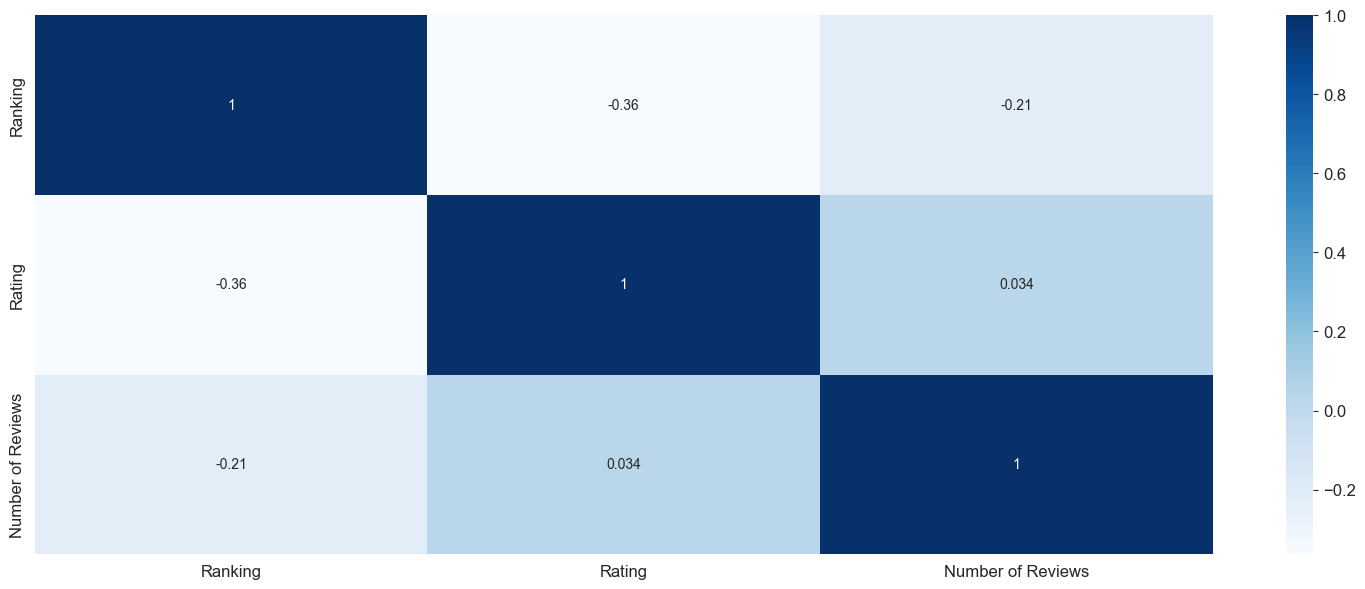

In [50]:
sns.heatmap(restaurant_df.corr(),cmap='Blues',annot=True)
plt.show()

In [51]:
grouped_data = pd.pivot_table(restaurant_df, values='Number of Reviews', index='Rating', columns='Price Range', aggfunc='sum', fill_value=0)
grouped_data[grouped_data.index>=4]

Price Range,High,Low,Medium,Unknown
Rating,,,,
4.0,193654,880284,2790134,1636691
4.5,185763,730180,2449274,1098031
5.0,8437,24797,91249,57390


- Restaurants with 'Low' and 'Medium' price range have significantly higher number of reviews compared to restaurants with 'High' price range, for all the ratings (4.0, 4.5 and 5.0).

- Restaurants with 'Medium' price range have the highest number of reviews across all the ratings.

- The number of reviews decreases as the rating increases for all the price ranges. This indicates that people tend to leave more reviews for lower-rated restaurants compared to higher-rated ones.

- Restaurants with a rating of 5.0 have the lowest number of reviews across all price ranges. This could be because there are fewer restaurants with this rating, or because people tend to leave fewer reviews for highly rated restaurants.

## 3.7 Analyze the words in “Reviews” that correlate with Rating and Price Range!

In [52]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

nltk.download('punkt')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocess the Reviews column
restaurant_df['Reviews'] = restaurant_df['Reviews'].str.replace('[^a-zA-Z\s]', '').str.lower()

# Tokenize the reviews
restaurant_df['Tokenized_Reviews'] = restaurant_df['Reviews'].apply(word_tokenize)

# Remove stopwords and perform lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
restaurant_df['Tokenized_Reviews'] = restaurant_df['Tokenized_Reviews'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x if word not in stop_words])

# Group the data by Rating and Price Range
grouped_data = restaurant_df.groupby(['Rating', 'Price Range'])['Tokenized_Reviews'].sum()

# Calculate word frequency for each group
grouped_data = grouped_data.apply(lambda x: Counter(x))

# Convert the Counter objects to DataFrames and sort by word frequency
grouped_data = grouped_data.apply(lambda x: pd.DataFrame(list(x.items()), columns=['Word', 'Frequency']).sort_values('Frequency', ascending=False))

# Display the results for each rating and price range combination
for index, value in grouped_data.items():
    print("Rating: {}, Price Range: {}".format(index[0], index[1]))
    print(value.head(10))
    print("\n")


[nltk_data] Downloading package punkt to /Users/macbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /Users/macbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/macbook/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Rating: 1.0, Price Range: High
          Word  Frequency
10        food          4
0     horrible          3
27       avoid          3
22        ever          3
11     service          2
29        poor          2
28       pizza          2
21       worst          2
39       staff          2
15  overpriced          2


Rating: 1.0, Price Range: Low
        Word  Frequency
9       food          5
10     worst          5
11      ever          4
17   service          4
21     pizza          3
5        bad          2
39  takeaway          2
35       ive          2
0      awful          2
61  terrible          2


Rating: 1.0, Price Range: Medium
          Word  Frequency
2         food         26
10     service         23
4        worst         23
15    terrible         19
24       avoid         14
11        ever         12
42         bad         11
37       awful         10
89        poor          9
38  disgusting          9


Rating: 1.0, Price Range: Unknown
        Word  Frequency
13    

In [53]:
grouped_data = restaurant_df.groupby(['Rating', 'Price Range'])['Tokenized_Reviews'].sum()

# Calculate word frequency for each group
grouped_data = grouped_data.apply(lambda x: Counter(x))

# Print out the top 10 most frequent words for each rating and price range combination
for index, value in grouped_data.items():
    print(f"Rating: {index[0]}, Price Range: {index[1]}")
    print(', '.join([word[0] for word in value.most_common(10)]))
    print("\n")

Rating: 1.0, Price Range: High
food, horrible, ever, avoid, service, bad, overpriced, worst, pizza, poor


Rating: 1.0, Price Range: Low
food, worst, ever, service, pizza, awful, bad, ive, takeaway, terrible


Rating: 1.0, Price Range: Medium
food, worst, service, terrible, avoid, ever, bad, awful, disgusting, poor


Rating: 1.0, Price Range: Unknown
food, worst, avoid, horrible, place, poor, service, trap, terrible, crappy


Rating: 1.5, Price Range: High
dont, service, go, food, avoid, tourist, overpriced, place, worst, ever


Rating: 1.5, Price Range: Low
terrible, food, service, restaurant, worst, place, good, price, expensive, average


Rating: 1.5, Price Range: Medium
food, avoid, service, worst, ever, bad, terrible, place, go, rip


Rating: 1.5, Price Range: Unknown
food, bad, service, place, expensive, good, experience, horrible, avoid, dont


Rating: 2.0, Price Range: High
place, food, service, bad, poor, good, staff, awful, go, nice


Rating: 2.0, Price Range: Low
food, good,

# 4. Credit Scoring

- SeriousDlqin2yrs: Indicates whether an individual has had a serious delinquency (defined as being 90 or more days past due
- Age: Age of borrower in years
- NumberOfTime30-59DaysPastDueNotWorse: Number of times borrower has been 30-59 days past due but no worse in the last two years.
- NumberOfTime60-89DaysPastDueNotWorse: Number of times borrower has been 60-89 days past due but no worse in the last two years.
- NumberOfTimes90DaysLate: Number of times the borrower has been 90 days or more past due.
- DebtRatio: Monthly debt payments, alimony, and living costs divided by monthly gross income
- MonthlyIncome: Monthly income
- NumberOfDependents: Number of dependents in the family excluding themselves (spouse, children, etc.)


In [54]:
credit_df = pd.read_excel('credit_scoring_sample.xlsx',engine='openpyxl')

In [55]:
credit_df.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


In [56]:
credit_df.duplicated().sum()

382

In [57]:
credit_df.drop_duplicates(inplace=True)

In [58]:
# Define a function to impute missing values in the MonthlyIncome column
def impute_monthly_income(row):
    if np.isnan(row['MonthlyIncome']):
        age = row['age']
        num_dep = row['NumberOfDependents']
        # Calculate the mean MonthlyIncome for rows with the same age and number of dependents
        mean_income = credit_df[(credit_df['age'] == age) & (credit_df['NumberOfDependents'] == num_dep)]['MonthlyIncome'].mean()
        return mean_income
    else:
        return row['MonthlyIncome']

# Apply the function to fill in missing values in the MonthlyIncome column
credit_df['MonthlyIncome'] = credit_df.apply(impute_monthly_income, axis=1)

# Print the updated DataFrame
credit_df.isna().sum()

SeriousDlqin2yrs                           0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfTimes90DaysLate                    0
NumberOfTime60-89DaysPastDueNotWorse       0
MonthlyIncome                           1068
NumberOfDependents                      1055
dtype: int64

Since the rest of missing values are less than 5% of data, we may simply remove them

In [59]:
credit_df = credit_df.dropna(subset=['NumberOfDependents'])
credit_df = credit_df.dropna(subset=['MonthlyIncome'])
credit_df.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.000000,0.0
1,0,58,0,3870.000000,0,0,6760.942922,0.0
2,0,41,0,0.456127,0,0,6666.000000,0.0
3,0,43,0,0.000190,0,0,10500.000000,2.0
4,1,49,0,0.271820,0,0,400.000000,0.0


In [60]:
credit_df.isna().sum()

SeriousDlqin2yrs                        0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfTimes90DaysLate                 0
NumberOfTime60-89DaysPastDueNotWorse    0
MonthlyIncome                           0
NumberOfDependents                      0
dtype: int64

In [61]:
unique_counts = credit_df.nunique()
print(unique_counts)

SeriousDlqin2yrs                            2
age                                        81
NumberOfTime30-59DaysPastDueNotWorse       16
DebtRatio                               37085
NumberOfTimes90DaysLate                    19
NumberOfTime60-89DaysPastDueNotWorse       12
MonthlyIncome                            8529
NumberOfDependents                         11
dtype: int64


## 4.1 Draw chart(s) showing how age, DebtRatio, MonthlyIncome and NumberOfDependents correlate with defaults!

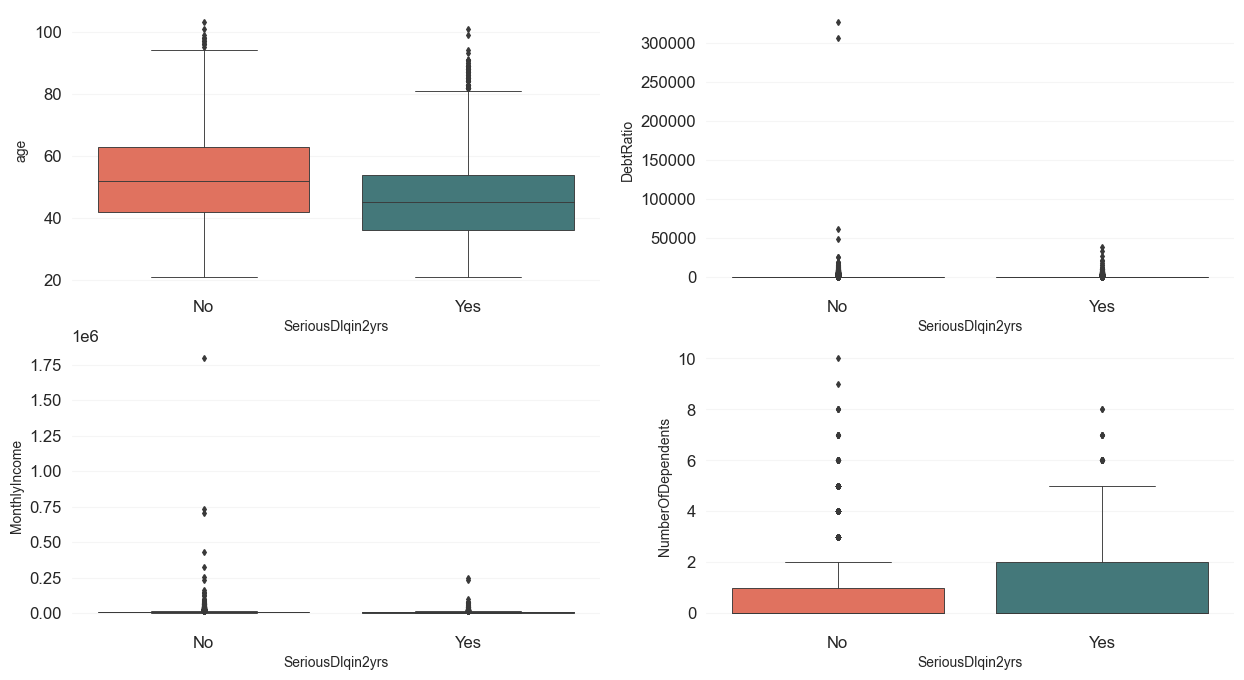

In [62]:
# Define the variables to plot
variables = ['age','DebtRatio', 'MonthlyIncome', 'NumberOfDependents']

# Create a loop to generate box plots for each variable
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# Create a boxplot for each column in the dataset
for i, column in enumerate(variables):
    sns.boxplot(y=credit_df[column], x=credit_df['SeriousDlqin2yrs'],ax=axs[i//2,i%2], palette=palette[::len(palette)-1],fliersize=3,linewidth=0.65)
#     axs[i//2, i%2].set_title('\n\n\n'+column)
#     axs[i//2, i%2].set_ylabel('')
    axs[i//2, i%2].set_xticklabels(['No','Yes'])


There are several outliers in 'DebtRatio' and 'MonthlyIncome'. The outliers seem to represent genuine observations, therefore we won't remove them

## 4.2 Do we have redundant columns?

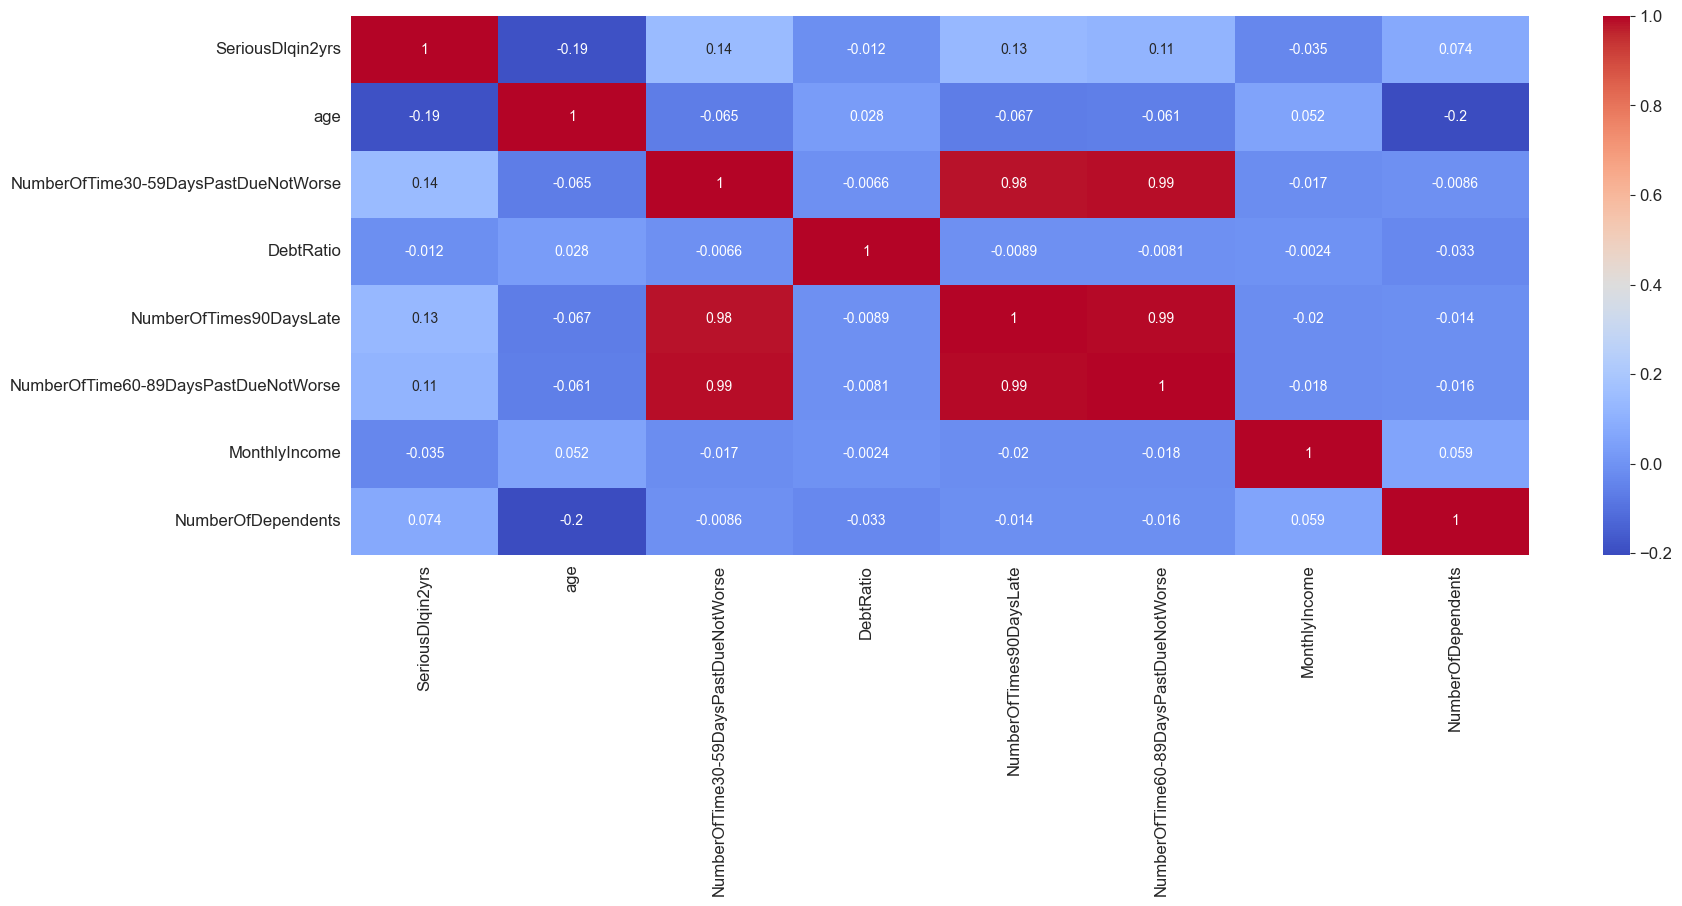

In [63]:
# compute correlation matrix
corr_matrix = credit_df.corr()

# plot heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

Looking at the matrix, we can see that there are several moderate correlations between certain pairs of variables. For example, the `NumberOfTime30-59DaysPastDueNotWorse` and `NumberOfTimes90DaysLate` variables have a correlation coefficient of 0.984544, indicating a very strong positive correlation. Similarly, the `NumberOfTime60-89DaysPastDueNotWorse` variable also has a strong positive correlation with these two variables, with correlation coefficients of 0.988555 and 0.992062, respectively.

**Those suggest that they contain redundant information**

On the other hand, we can see that the `MonthlyIncome` variable has a weak positive correlation with the `NumberOfDependents` variable, with a correlation coefficient of 0.059296. This indicates that there is very little correlation between these two variables.



## 4.3 Explain do we have balanced data set? Provide visualization! 

Not having a serious delinquency : 77.47%
Having a serious delinquency     : 22.53%


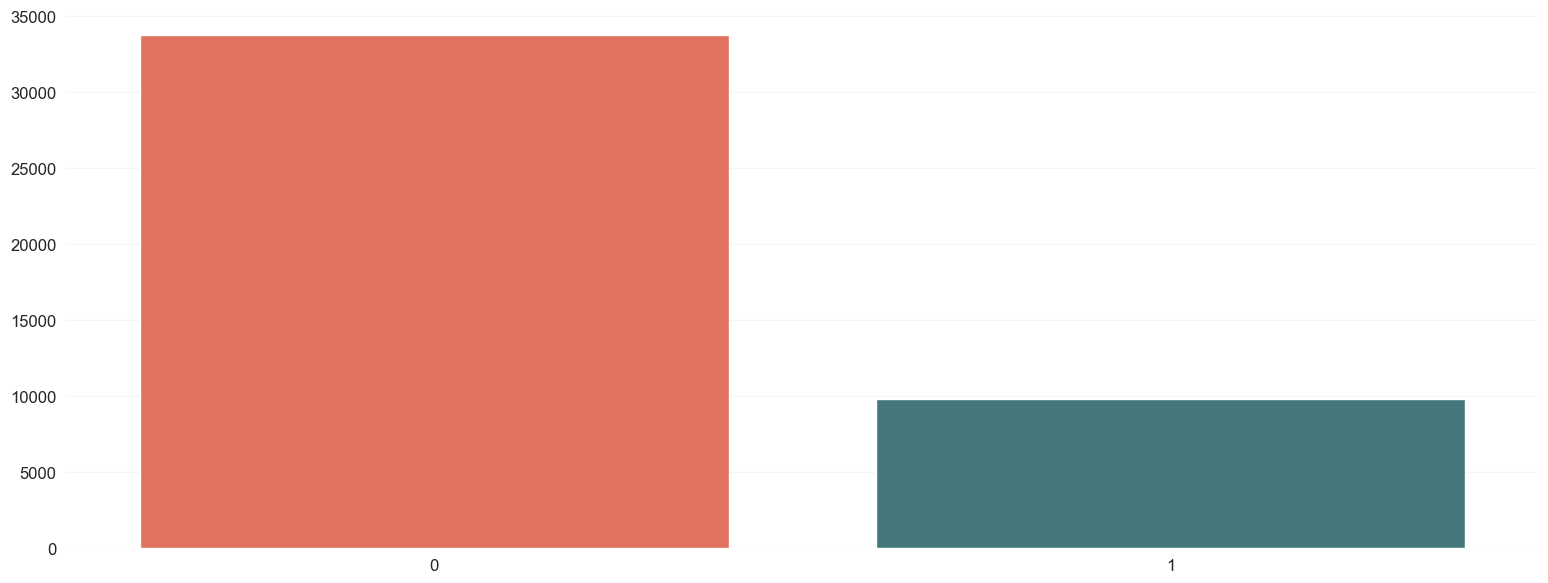

In [64]:
print('Not having a serious delinquency : {:.2f}%'.format(credit_df.SeriousDlqin2yrs.value_counts()[0]/len(credit_df)*100))
print('Having a serious delinquency     : {:.2f}%'.format(credit_df.SeriousDlqin2yrs.value_counts()[1]/len(credit_df)*100))

sns.barplot(x=credit_df.SeriousDlqin2yrs.value_counts().index, y=credit_df.SeriousDlqin2yrs.value_counts().values, palette=palette[::len(palette)-1])
plt.show()


The data is imbalanced because the percentage of samples in the "Not having a serious delinquency" class is much higher than the "Having a serious delinquency" class. In an imbalanced dataset, the minority class (in this case, "Having a serious delinquency") may be underrepresented, which can cause issues when training a machine learning model.

Furthermore, if the percentages are roughly equal, then the data is balanced. If one class has a significantly higher percentage than the other, then the data is imbalanced. A commonly used threshold for imbalance is 70/30, meaning that if one class has less than 30% of the samples, then the data is considered imbalanced. In this case, the "Having a serious delinquency" class has only 22.53% of the samples, so the data is imbalanced.

## 4.4 Analyze which are the most instrumental feature that the credit company need in monitoring the default?

We will utilize Random Forest machine learning algorithm to determine the most significant feature based on its feature importance value. 

However, given the presence of redundant information in certain columns, specifically `NumberOfTime30-59DaysPastDueNotWorse`, `NumberOfTime60-89DaysPastDueNotWorse`, and `NumberOfTimes90DaysLate`, we will select the one with the highest correlation with the dependent variable, which is `NumberOfTime30-59DaysPastDueNotWorse`.

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [66]:
rf = RandomForestClassifier(random_state=0)
rf.fit(credit_df.drop(['SeriousDlqin2yrs','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse'], axis=1), credit_df.SeriousDlqin2yrs)

# Print the feature importances
print(rf.feature_importances_)

[0.16514054 0.15103121 0.36816626 0.27216669 0.0434953 ]


In [67]:
rf.feature_importances_

array([0.16514054, 0.15103121, 0.36816626, 0.27216669, 0.0434953 ])

In [68]:
fi_df = pd.DataFrame([credit_df.drop(['SeriousDlqin2yrs','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse'], axis=1).columns, rf.feature_importances_]).T.rename({0:'column',1:'importance'},axis=1)
fi_df


,column,importance
0,age,0.165141
1,NumberOfTime30-59DaysPastDueNotWorse,0.151031
2,DebtRatio,0.368166
3,MonthlyIncome,0.272167
4,NumberOfDependents,0.043495


According to the table above, the feature with the highest importance is `DebtRatio`, which contributes 36.8% to the total feature importance. This is followed by `MonthlyIncome`, which contributes 27.2%, `age` with 16.5%, `NumberOfTime30-59DaysPastDueNotWorse` with 15.1%, and finally `NumberOfDependents` with 4.3%.

Based on this information, we can conclude that `DebtRatio` and `MonthlyIncome` are the most important features in predicting the target variable and it quite does make sense since those two are strongly related to an individual's creditworthiness and ability to repay a loan. 

It is also worth noting that `age` and `NumberOfTime30-59DaysPastDueNotWorse` are also relatively important features, but to a lesser extent compared to `DebtRatio` and `MonthlyIncome`. On the other hand, `NumberOfDependents` seems to be the least important feature in predicting the target variable.

# 5. Walmart

- Store - the store number
- Dept - the department number
- Date - the week
- Weekly_Sales - sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week
- Temperature - average temperature in the region
- Fuel_Price - cost of fuel in the region
- MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
- CPI - the consumer price index
- Unemployment - the unemployment rate
- IsHoliday - whether the week is a special holiday week
- Weekly_Sales: The weekly department wide sales
- Type: An anonymized description on which type of store it is

In [69]:
walmart_df = pd.read_excel('walmart data.xlsx',engine='openpyxl')

In [70]:
walmart_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819


In [71]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282451 entries, 0 to 282450
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         282451 non-null  int64         
 1   Dept          282451 non-null  int64         
 2   Date          282451 non-null  datetime64[ns]
 3   Weekly_Sales  282451 non-null  float64       
 4   IsHoliday     282451 non-null  bool          
 5   Temperature   282451 non-null  float64       
 6   Fuel_Price    282451 non-null  float64       
 7   MarkDown1     100520 non-null  float64       
 8   MarkDown2     74232 non-null   float64       
 9   MarkDown3     91521 non-null   float64       
 10  MarkDown4     90031 non-null   float64       
 11  MarkDown5     101029 non-null  float64       
 12  CPI           282451 non-null  float64       
 13  Unemployment  282451 non-null  float64       
 14  Type          282451 non-null  object        
 15  Size          282

In [72]:
walmart_df.duplicated().sum()

0

### Handling missing values

In [73]:
walmart_df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       181931
MarkDown2       208219
MarkDown3       190930
MarkDown4       192420
MarkDown5       181422
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

Since the data before Nov 2011 for Markdown columns are NA, therefore we can separate them first to impute the rest of it

In [74]:
walmart_df[walmart_df.Date > '2011-11-01'].isna().sum()/walmart_df.shape[0]*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1        0.884401
MarkDown2       10.191502
MarkDown3        4.070441
MarkDown4        4.597966
MarkDown5        0.704193
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64

Less than 15% of the data in columns after Nov 2011 are missing. To handle missing values, we can drop rows with missing values based on column that has low percentage

In [75]:
walmart_df_new = pd.concat([walmart_df[walmart_df.Date < '2011-11-01'], walmart_df[walmart_df.Date > '2011-11-01'].dropna(subset='MarkDown1')])
walmart_df_new.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078
6,19,14,2010-08-06,18882.41,False,74.20,2.942,NaN,NaN,NaN,NaN,NaN,132.614193,8.099,A,203819


In [76]:
walmart_df_new.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       179433
MarkDown2       205790
MarkDown3       188815
MarkDown4       189922
MarkDown5       179433
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [77]:
walmart_df_new[walmart_df_new.Date > '2011-11-01'].isna().sum()/walmart_df_new.shape[0]*100

Store           0.000000
Dept            0.000000
Date            0.000000
Weekly_Sales    0.000000
IsHoliday       0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.000000
MarkDown2       9.414795
MarkDown3       3.351277
MarkDown4       3.746700
MarkDown5       0.000000
CPI             0.000000
Unemployment    0.000000
Type            0.000000
Size            0.000000
dtype: float64

#### Handling missing values data after Nov 2011

In [78]:
df_new_after_nov11 = walmart_df_new[walmart_df_new.Date > '2011-11-01']
df_new_after_nov11.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,100520.000000,100520.000000,100520.000000,100520.000000,100520.000000,100520.000000,74163.000000,91138.000000,90031.000000,100520.000000,100520.000000,100520.000000,100520.00000
mean,22.141156,44.512266,16246.415212,59.739248,3.659289,7246.077559,3321.493511,1423.324426,3379.591745,4659.626425,174.808129,7.408116,136886.49814
std,12.773563,30.658221,23311.987607,17.620572,0.288457,8254.606267,9489.447925,9567.461544,6269.428446,6069.107743,40.317404,1.729307,60920.87861
min,1.000000,1.000000,-1699.000000,7.460000,3.031000,0.270000,-265.760000,-29.100000,0.220000,135.160000,129.816710,3.879000,34875.00000
25%,11.000000,18.000000,2037.345000,47.110000,3.477000,2241.190000,41.280000,5.070000,508.100000,1891.770000,136.503067,6.334000,93638.00000
50%,22.000000,38.000000,7579.205000,60.770000,3.666000,5363.520000,192.000000,24.700000,1482.030000,3374.900000,189.194056,7.244000,140167.00000
75%,33.000000,74.000000,20484.770000,73.700000,3.864000,9235.590000,1926.050000,103.830000,3607.570000,5588.470000,219.904907,8.256000,202505.00000
max,45.000000,99.000000,649770.180000,100.070000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,12.890000,219622.00000


since `MarkDown2`, `MarkDown3`, `MarkDown4` seem to have right-skewed distribution, the missing values will be imputed by median

In [79]:
for col in ['MarkDown2', 'MarkDown3', 'MarkDown4']:
    col_median = df_new_after_nov11[col].median()
    df_new_after_nov11[col].fillna(col_median, inplace=True)

In [80]:
walmart_df_new.loc[df_new_after_nov11.index] = df_new_after_nov11
walmart_df_new.isna().sum()/walmart_df_new.shape[0]

Store           0.00000
Dept            0.00000
Date            0.00000
Weekly_Sales    0.00000
IsHoliday       0.00000
Temperature     0.00000
Fuel_Price      0.00000
MarkDown1       0.64094
MarkDown2       0.64094
MarkDown3       0.64094
MarkDown4       0.64094
MarkDown5       0.64094
CPI             0.00000
Unemployment    0.00000
Type            0.00000
Size            0.00000
dtype: float64

The further analysis won't use those 5 columns. Hence, we can keep them for now

## 5.1 Which store and which department have high weekly sales?

In [81]:
walmart_df_new.groupby('Store').sum()['Weekly_Sales'].sort_values(ascending=False).reset_index().head()

,Store,Weekly_Sales
0,20,1.970544e+08
1,4,1.966762e+08
2,13,1.917312e+08
3,14,1.914948e+08
4,2,1.842976e+08


Based on the output above, **Store 20** has the highest weekly sales with 1.970544e+08.

In [82]:
walmart_df_new.groupby('Dept').sum()['Weekly_Sales'].sort_values(ascending=False).reset_index().head()

,Dept,Weekly_Sales
0,92,3.151112e+08
1,95,2.994776e+08
2,38,2.626025e+08
3,72,2.024588e+08
4,90,1.970227e+08


Based on the output above, **Dept 92** has the highest weekly sales with 3.151112e+08

## 5.2 Which month that have meager sales?

In [83]:
walmart_df_new['Month'] = walmart_df_new.Date.dt.month
walmart_df_new.groupby('Month').sum()['Weekly_Sales'].sort_values().reset_index().head()

,Month,Weekly_Sales
0,1,2.184674e+08
1,11,2.409283e+08
2,5,3.738709e+08
3,2,3.823559e+08
4,12,3.851144e+08


Answer: **January**

## 5.3 Do sales change over time?

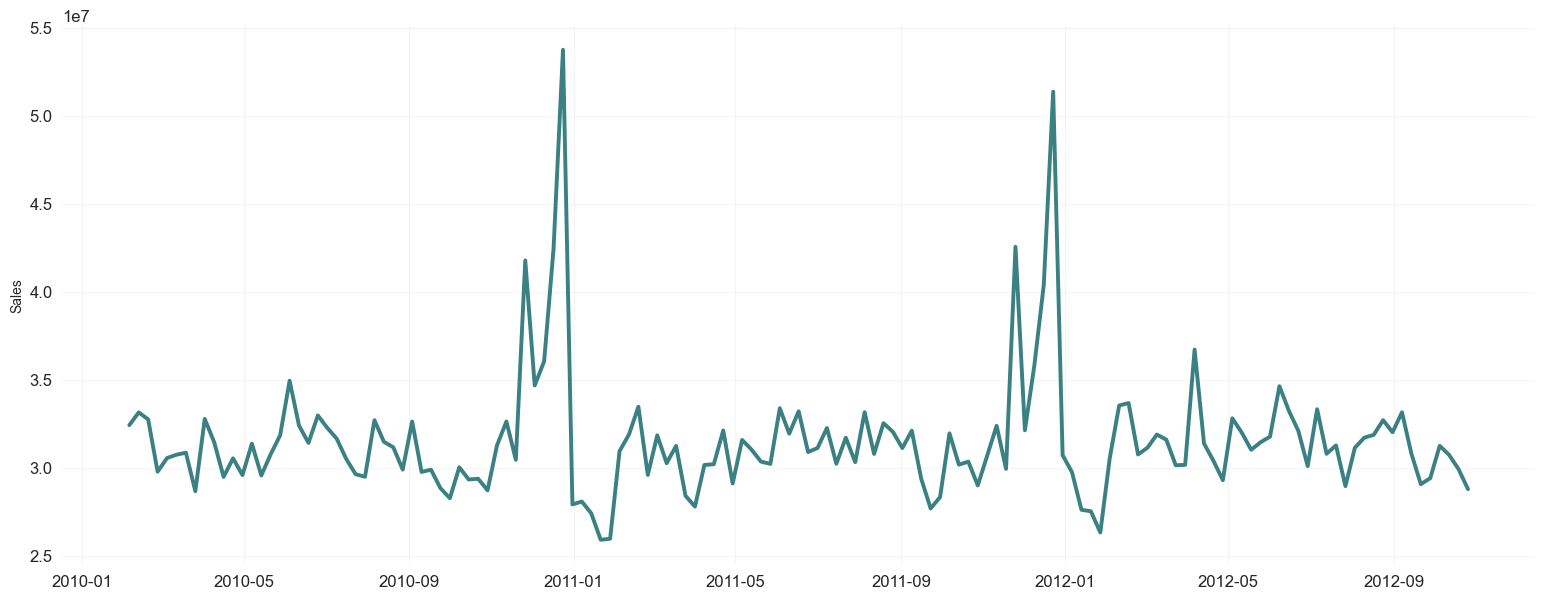

In [84]:
grouped_walmart = walmart_df_new.groupby('Date').sum().reset_index()
sns.lineplot(x='Date', y='Weekly_Sales', data=grouped_walmart,color=palette[-1])
plt.xlabel('')
plt.ylabel('Sales')
plt.show()

Yes, it does. However, the data seems to have seasonality in which at the of end of the year the sales tends to high while the other months are fluctuative, but look stationary


## 5.4 Draw the weekly sales chart! Do specific weeks or months have a trend or pattern that repeats every month/year?


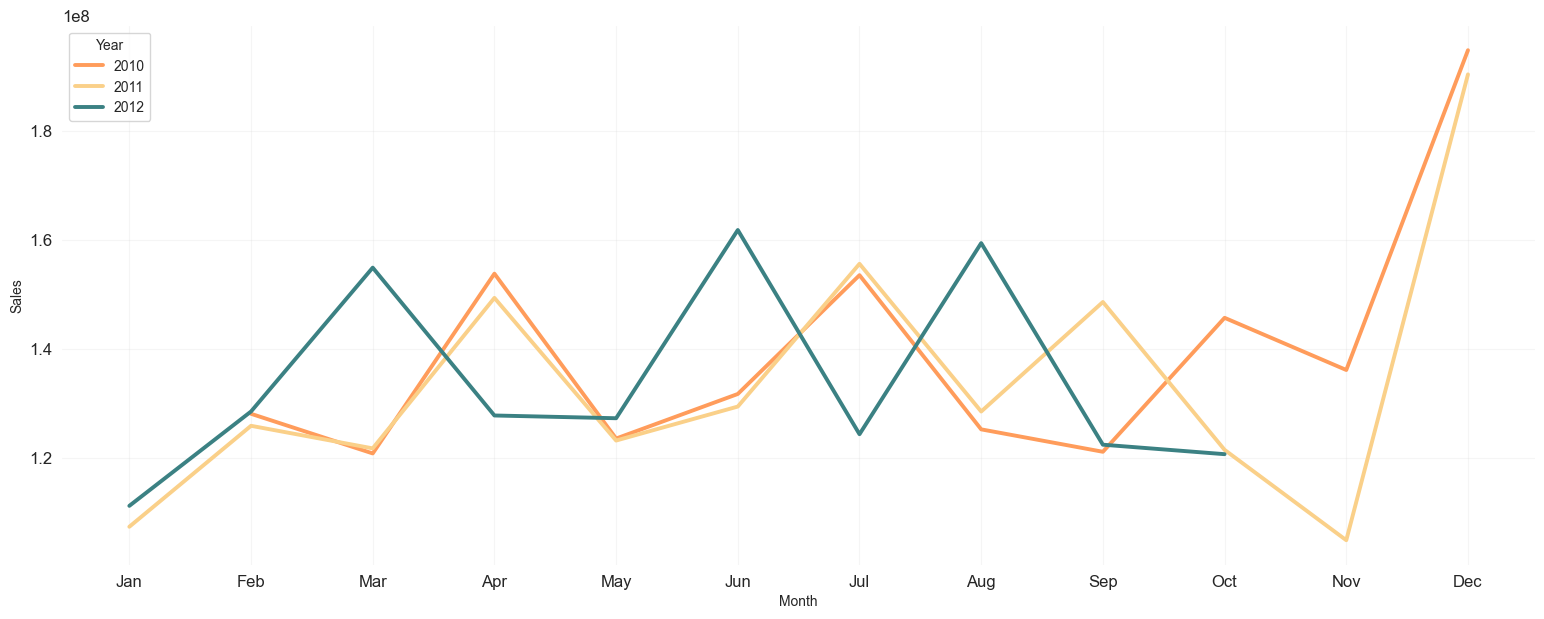

In [85]:
grouped_walmart['Month'] = grouped_walmart.Date.dt.month
grouped_walmart['Year'] = grouped_walmart.Date.dt.year
sns.lineplot(x='Month',y='Weekly_Sales',data=grouped_walmart.groupby(['Month','Year']).sum()[['Weekly_Sales']].reset_index(),hue='Year',palette=palette[1:])
plt.xticks(ticks=[i for i in range(1,13)],labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel("Sales")
plt.show()

From the plot, we can see that there appears to be a repeating pattern in the data every year. There is a peak in sales around December and a dip in sales around May. This suggests that there is seasonality in the data.

There is also an increasing sales from May to June

## 5.5 Find the correlation of Weekly_Sales, IsHoliday, Temperature, Fuel_Price, CPI, and Unemployment.

In [86]:
num_column = ['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']
cat_column = 'IsHoliday'
walmart_df_new['IsHoliday'] = walmart_df_new['IsHoliday'].apply(lambda x: 1 if x==True else 0)

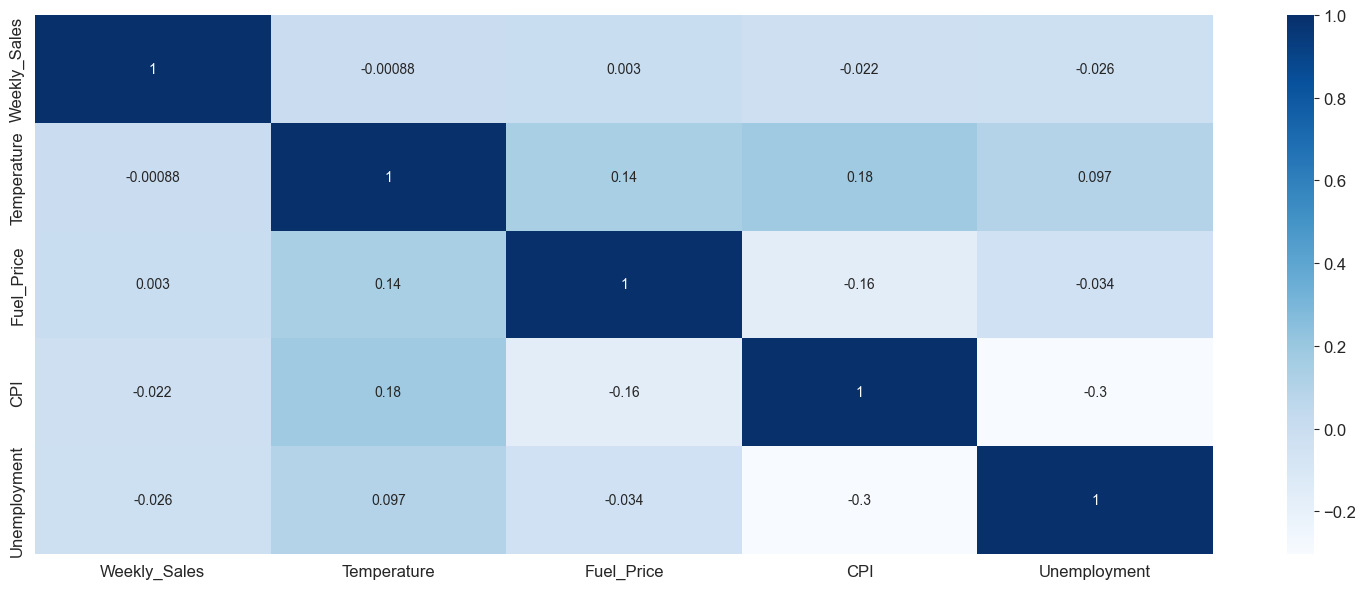

In [87]:
sns.heatmap(walmart_df_new[num_column].corr(), annot=True, cmap="Blues")
plt.show()

- The correlation between ``Weekly_Sales`` and `Temperature` is very weak, with a coefficient of -0.000881, indicating no meaningful relationship between these two variables.


- The correlation between `Weekly_Sales` and `Fuel_Price` is also very weak, with a coefficient of 0.002969, indicating no meaningful relationship between these two variables.


- The correlation between `Weekly_Sales` and `CPI` is negative but weak, with a coefficient of -0.022436, indicating a slight inverse relationship between these two variables. This could suggest that higher CPI values could potentially lead to lower weekly sales.


- The correlation between `Weekly_Sales` and `Unemployment` is also negative but weak, with a coefficient of -0.026054, indicating a slight inverse relationship between these two variables. This could suggest that higher unemployment rates could potentially lead to lower weekly sal


- The correlation between `Temperature` and `Fuel_Price` is weak, with a coefficient of 0.142849, indicating a slight positive relationship between these two variables.


- The correlation between `Temperature` and `CPI` is also weak, with a coefficient of 0.181922, indicating a slight positive relationship between these two variables.

- The correlation between `Fuel_Price` and `CPI` is negative but weak, with a coefficient of -0.161888, indicating a slight inverse relationship between these two variables. This could suggest that higher fuel prices could potentially lead to lower CPI values.

In [88]:
# iterate over the numerical columns and perform chi-square test
for col in num_column:
    # create contingency table between the categorical and numerical variables
    cont_table = pd.crosstab(walmart_df_new[cat_column], walmart_df_new[col])
    # perform the chi-square test and print the results
    chi2, pval, dof, expected = chi2_contingency(cont_table)
    print(f"Chi-square test between {cat_column} and {col}:")
    print(f"Chi2: {chi2}, p-value: {pval}, degrees of freedom: {dof}")


Chi-square test between IsHoliday and Weekly_Sales:
Chi2: 246888.65257534254, p-value: 0.10814975663637001, degrees of freedom: 246021
Chi-square test between IsHoliday and Temperature:
Chi2: 213090.41826376526, p-value: 0.0, degrees of freedom: 3500
Chi-square test between IsHoliday and Fuel_Price:
Chi2: 206709.766310951, p-value: 0.0, degrees of freedom: 885
Chi-square test between IsHoliday and CPI:
Chi2: 279953.0, p-value: 0.0, degrees of freedom: 2129
Chi-square test between IsHoliday and Unemployment:
Chi2: 12818.899276077384, p-value: 0.0, degrees of freedom: 348


In [89]:
from scipy.stats import f_oneway

anova_results = pd.DataFrame(columns=['Cat_Column','Num_Column', 'P-Value', 'ANOVA Score'])

# Perform ANOVA for each numerical column and store the results in the dataframe
for col in num_column:
    # Group the data by "IsHoliday" and the current numerical column
    category_group_lists = walmart_df_new.groupby('IsHoliday')[col].apply(list)
    
    # Perform ANOVA
    anova_results_current = f_oneway(*category_group_lists)
    
    # Store the results in the dataframe
    anova_results = anova_results.append({
        'Cat_Column': 'IsHoliday',
        'Num_Column': col,
        'P-Value': anova_results_current[1],
        'ANOVA Score': anova_results_current[0]
    }, ignore_index=True)

# Print the ANOVA results
anova_results

,Cat_Column,Num_Column,P-Value,ANOVA Score
0,IsHoliday,Weekly_Sales,9.052947e-11,42.019232
1,IsHoliday,Temperature,0.000000e+00,7156.884371
2,IsHoliday,Fuel_Price,0.000000e+00,1660.251937
3,IsHoliday,CPI,1.361839e-01,2.220570
4,IsHoliday,Unemployment,6.748286e-11,42.593918


- `IsHoliday` and `Weekly_Sales`, the p-value for the ANOVA test is very small (9.05e-11), indicating a highly significant relationship between the two variables. The ANOVA score is 42.02, suggesting a large difference in the mean weekly sales between holidays and non-holidays.


- `IsHoliday` and `Temperature`, the p-value is 0.0, indicating a highly significant relationship. The ANOVA score is very large (7156.88), suggesting a large difference in the mean temperature between holidays and non-holidays.


- `IsHoliday` and `Fuel_Price`, the p-value is also 0.0, indicating a highly significant relationship. The ANOVA score is 1660.25, suggesting a large difference in the mean fuel price between holidays and non-holidays.


- `IsHoliday` and `CPI`, the p-value is 0.136, which is greater than the typical significance level of 0.05. Therefore, we cannot conclude that there is a significant relationship between the two variables. The ANOVA score is 2.22, which is relatively small compared to the other variables.


- `IsHoliday` and `Unemployment`, the p-value is very small (6.75e-11), indicating a highly significant relationship. The ANOVA score is 42.59, suggesting a large difference in the mean unemployment rate between holidays and non-holidays.

# 6. Delayed Flights

In [121]:
flight_df = pd.read_csv('DelayedFlights.csv')
flight_df.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,1.928371e+06,1.936560e+06,1.928371e+06,1.928371e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,1.333059e+02,1.343027e+02,1.082771e+02,4.219988e+01,4.318518e+01,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,7.206007e+01,7.134144e+01,6.864261e+01,5.678472e+01,5.340250e+01,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [122]:
flight_df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


## 6.1 Perform data preprocessing!

In [123]:
flight_df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1936753    False
1936754    False
1936755    False
1936756    False
1936757    False
Length: 1936758, dtype: bool

In [124]:
flight_df.isna().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [125]:
#since there are small number of missing flight_df in proportion to the size of the flight_dfset, all the rows missing flight_df from columns can be dropped

flight_df.dropna(subset=['ArrTime','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','TaxiIn','TaxiOut'])

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


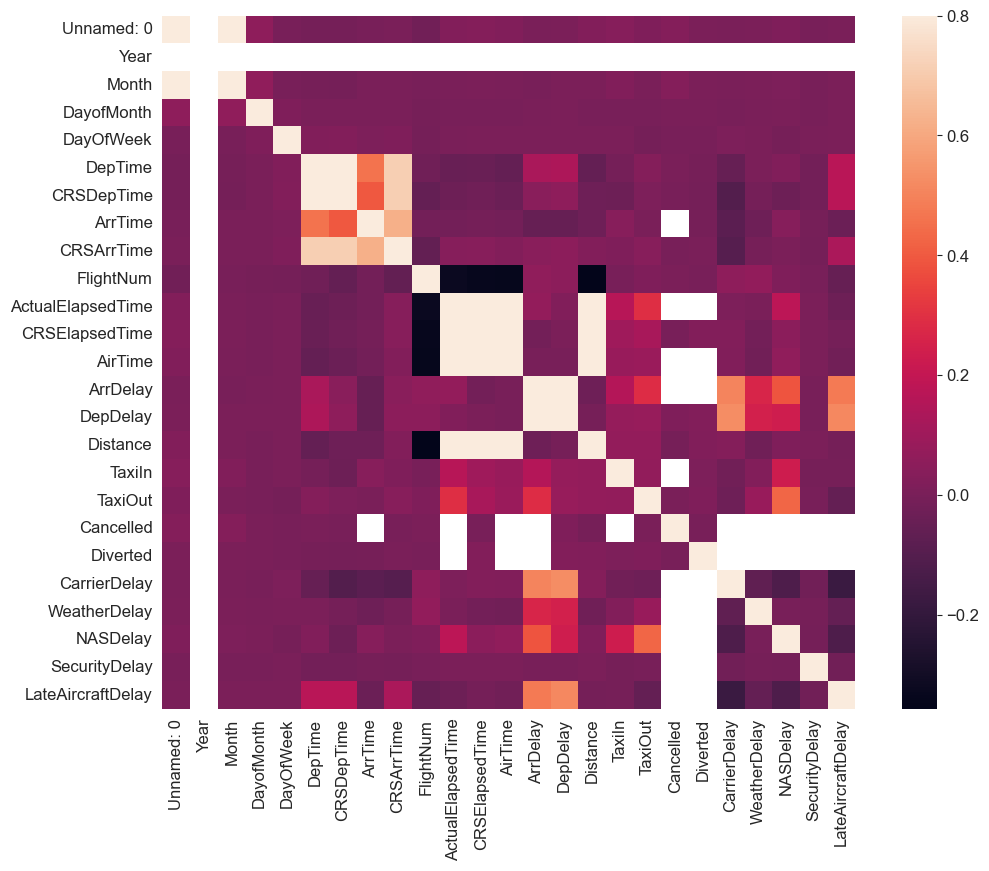

In [126]:
#correlation matrix

corrmat = flight_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#we see that 29 variables in flight_dfset present multicollinearity (linearly predicted from the others)
#to have better analysis and work with lighter flight_dfset, we will delete some of unwanted variables and create new oness

In [127]:
# convert date columns to datetime
flight_df['day'] = flight_df['DayofMonth']


flight_df['DepDate'] = pd.to_datetime(flight_df[['Year', 'Month', 'day']])
# create 'Status' column based on delay and cancellation/diversion status
conditions = [(flight_df['ArrDelay'] <= 15),
              (flight_df['ArrDelay'] >= 15) & (flight_df['ArrDelay'] < 60),
              (flight_df['ArrDelay'] >= 60),
              (flight_df['Diverted'] == 1),
              (flight_df['Cancelled'] == 1)]
choices = [0, 1, 2, 3, 4]
flight_df['Status'] = np.select(conditions, choices)

# map cancellation codes to numeric values
flight_df['CancellationCode'] = flight_df['CancellationCode'].map({'A': 0, 'B': 1, 'C': 2})

# drop unwanted columns
flight_df = flight_df.drop(['Unnamed: 0', 'Year', 'DayofMonth','day'], axis=1, errors='ignore')

## 6.2 Explain, analyze, and visualize the data!

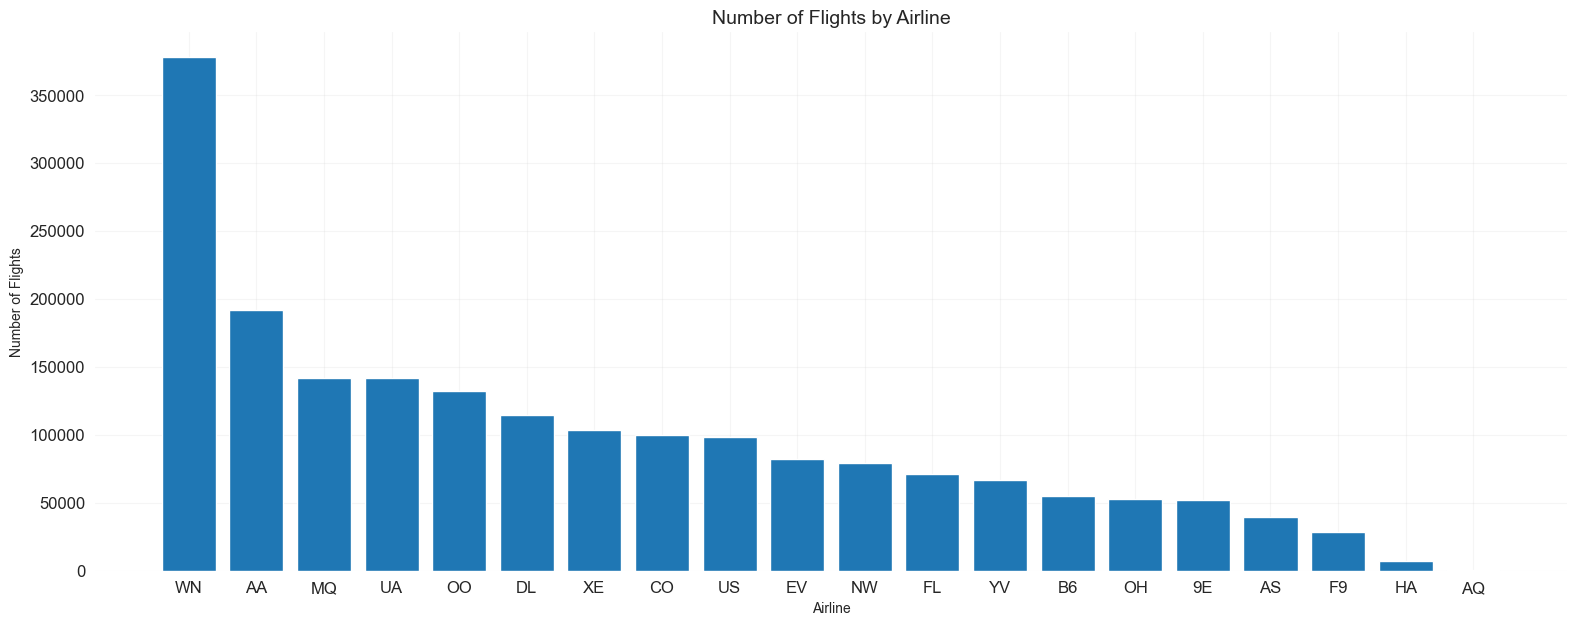

In [128]:
airline_counts = flight_df['UniqueCarrier']. value_counts()
fig, ax = plt.subplots()
ax.bar(airline_counts.index, airline_counts.values)

# Set chart title, axis labels and display the chart
ax.set_title('Number of Flights by Airline')
ax.set_xlabel('Airline')
ax.set_ylabel('Number of Flights')
plt.show()

In [129]:
# Count the number of flights for each unique origin airport
origin_counts = flight_df['Origin'].value_counts()
origin_counts

ATL    131613
ORD    125979
DFW     95414
DEN     74323
LAX     58772
        ...  
BJI         4
PIR         3
PUB         2
INL         1
TUP         1
Name: Origin, Length: 303, dtype: int64

In [130]:
# Look how many destination that exist this data
flight_df['Dest']. value_counts()

ORD    108984
ATL    106898
DFW     70657
DEN     63003
LAX     59969
        ...  
INL         9
PIR         3
CYS         1
TUP         1
OGD         1
Name: Dest, Length: 304, dtype: int64

In [133]:
# Look how many cancelled flights
print("Number of succed flights: ", flight_df['Cancelled'].value_counts()[0])
print("Number of cancelled flights: ", flight_df['Cancelled'].value_counts()[1])

Number of succed flights:  1936125
Number of cancelled flights:  633


In [135]:
# Look how many diverted flights
print("Number of undiverted flights: ", flight_df['Diverted'].value_counts()[0])
print("Number of diverted flights: ", flight_df['Diverted'].value_counts()[1])

Number of undiverted flights:  1929004
Number of diverted flights:  7754


In [138]:
def summarize_flights_by_column(df, col_name):
    # Create a pivot table to count the number of flights for each airline and the specified column
    summary_table = pd.pivot_table(df,
                                   values='FlightNum',
                                   index='UniqueCarrier',
                                   columns=col_name,
                                   aggfunc=len,
                                   fill_value=0)

    # Add a column for the total number of flights for each airline
    summary_table['Total'] = summary_table.sum(axis=1)

    # Rename the columns
    summary_table = summary_table.rename(columns={0: f'Not {col_name}', 1: col_name})

    # Calculate the percentage of flights that had the specified column value for each airline
    summary_table[f'{col_name} %'] = summary_table[col_name] / summary_table['Total'] * 100

    # Sort the airlines by the percentage of flights with the specified column value in descending order
    summary_table = summary_table.sort_values(by=f'{col_name} %', ascending=False)

    # Display the summary table
    print(f"Summary of flights by {col_name} for each airline:")
    print(summary_table)


In [140]:
summarize_flights_by_column(flight_df, 'Cancelled')

Summary of flights by Cancelled for each airline:
Cancelled      Not Cancelled  Cancelled   Total  Cancelled %
UniqueCarrier                                               
9E                     51827         58   51885     0.111786
YV                     67010         53   67063     0.079030
MQ                    141816        104  141920     0.073281
OO                    132344         89  132433     0.067204
XE                    103617         46  103663     0.044375
HA                      7487          3    7490     0.040053
CO                    100157         38  100195     0.037926
EV                     81848         29   81877     0.035419
UA                    141379         47  141426     0.033233
AS                     39282         11   39293     0.027995
US                     98399         26   98425     0.026416
AA                    191819         46  191865     0.023975
OH                     52645         12   52657     0.022789
NW                     79092       

In [141]:
summarize_flights_by_column(flight_df, 'Diverted')

Summary of flights by Diverted for each airline:
Diverted       Not Diverted  Diverted   Total  Diverted %
UniqueCarrier                                            
AQ                      744         6     750    0.800000
AS                    39021       272   39293    0.692235
B6                    54935       380   55315    0.686975
9E                    51627       258   51885    0.497254
AA                   190956       909  191865    0.473771
XE                   103193       470  103663    0.453392
FL                    70976       308   71284    0.432075
DL                   113749       489  114238    0.428054
OO                   131869       564  132433    0.425876
CO                    99769       426  100195    0.425171
MQ                   141327       593  141920    0.417841
US                    98033       392   98425    0.398273
WN                   376216      1386  377602    0.367053
OH                    52465       192   52657    0.364624
YV                    6

## 6.3. Give insights, trends, relations, and patterns, and give visualization!

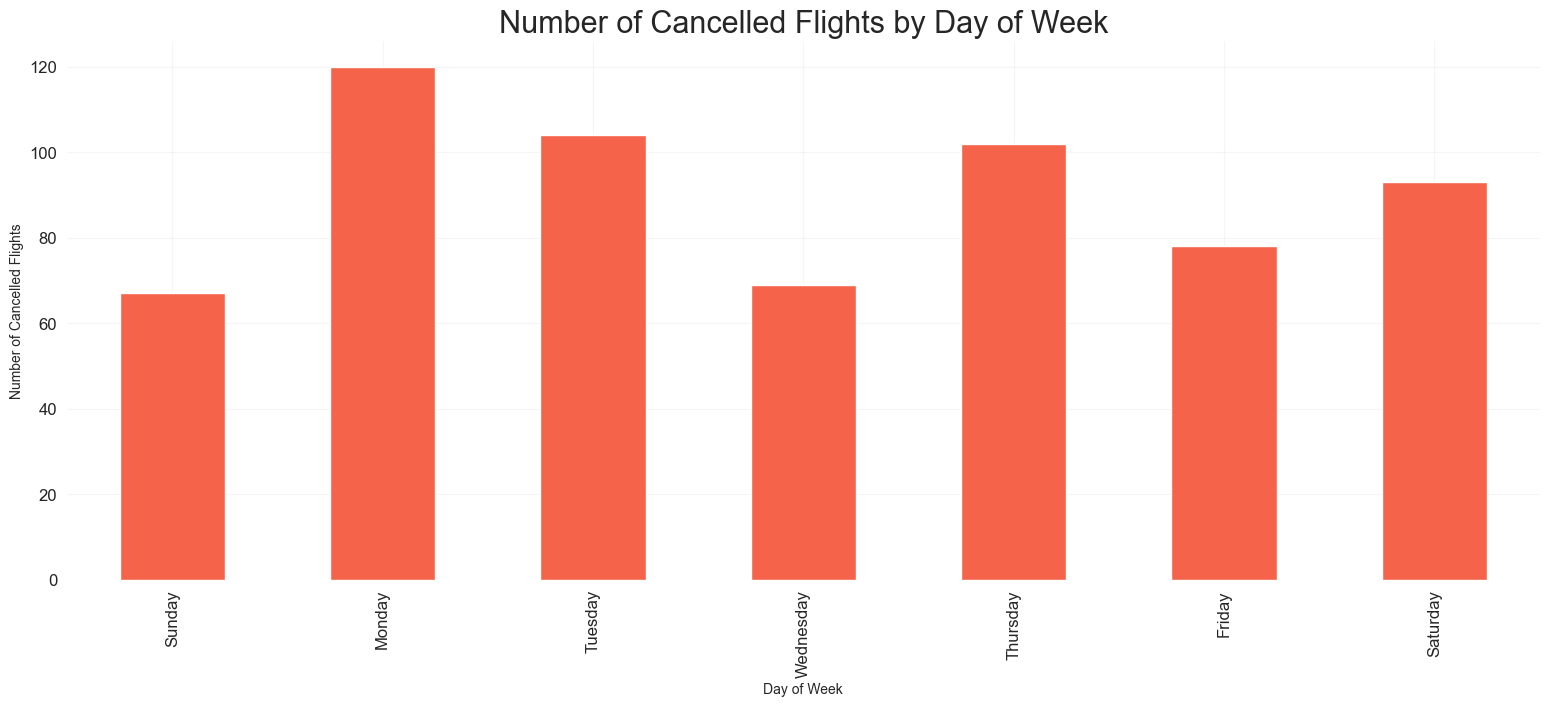

In [144]:
# Create a bar plot of the number of cancelled flights by day of week
flight_df[flight_df['Cancelled'] == 1]['DayOfWeek'].value_counts().sort_index().plot(kind='bar',color=palette[0])

# Set the x and y axis labels
plt.xlabel('Day of Week')
plt.ylabel('Number of Cancelled Flights')
plt.xticks(range(7), ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title('Number of Cancelled Flights by Day of Week',size=22)
plt.show()

From the given data, we can interpret that the maximum number of flights were cancelled on Tuesday with 120 cancellations, followed by Wednesday with 104 cancellations, and Friday with 102 cancellations. On the other hand, the minimum number of cancellations were on Monday with 67 cancellations, followed by Thursday with 69 cancellations and Sunday with 93 cancellations. 

Text(0, 0.5, 'Count')

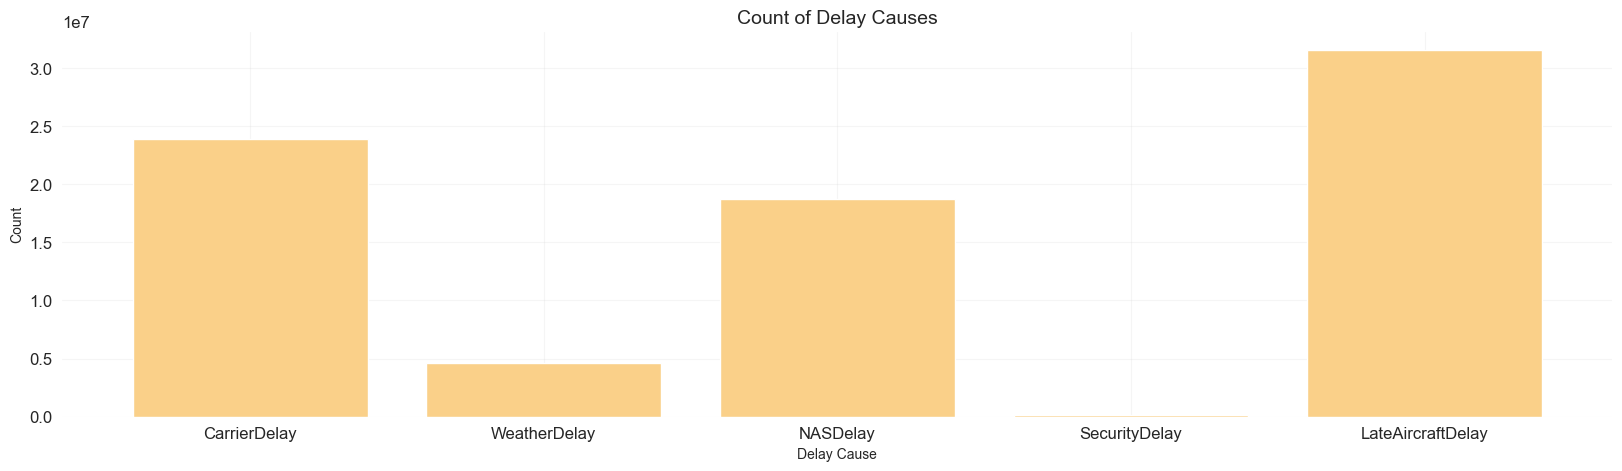

In [167]:
# Define the columns to use
delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

# Calculate the count and total minutes of delay caused by each factor
delay_counts = flight_df[delay_cols].sum()
delay_minutes = flight_df[delay_cols].sum()

# Plot the bar charts
fig, (ax1) = plt.subplots(1, 1, figsize=(20,5))
ax1.bar(delay_counts.index, delay_counts.values, color=palette[2])
ax1.set_title('Count of Delay Causes')
ax1.set_xlabel('Delay Cause')
ax1.set_ylabel('Count')

CarrierDelay: This indicates the total number of minutes delayed due to the airline carrier, which is the fault of the airline. The value of 23,926,070 indicates a high number of delays due to the airline carrier, and it could be an area of concern for the airline to improve its operations and management.

WeatherDelay: This indicates the total number of minutes delayed due to weather conditions such as thunderstorms, snowstorms, etc. The value of 4,620,160 indicates that weather has caused a considerable number of delays.

NASDelay: This indicates the total number of minutes delayed due to the National Aviation System (NAS), which includes delays caused by non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. The value of 18,739,310 indicates a significant number of delays attributed to NAS.

SecurityDelay: This indicates the total number of minutes delayed due to security-related reasons such as security breaches, bomb threats, etc. The value of 112,445 indicates a relatively small number of delays caused by security reasons.

LateAircraftDelay: This indicates the total number of minutes delayed due to the late arrival of an aircraft from a previous flight. The value of 31,557,038 indicates a high number of delays due to late aircraft arrivals, and it could be an area of concern for the airline to improve its flight scheduling and management.

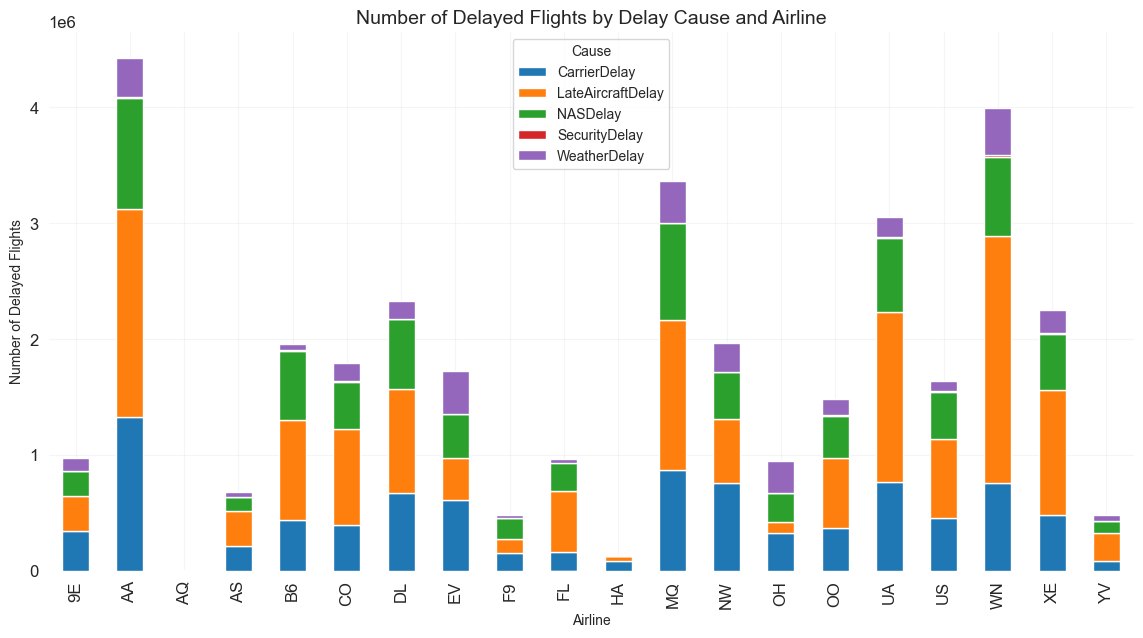

In [150]:
# Filter the data for delayed flights only
delayed_flights = flight_df[flight_df['DepDelay'] > 0]

# Group the data by airline and delay cause, and calculate the count of delayed flights for each combination
delayed_by_airline = delayed_flights.groupby(['UniqueCarrier', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'])['DepDelay'].count().reset_index()

# Melt the data to create a 'Cause' column that will hold the name of the delay cause
delayed_by_airline = pd.melt(delayed_by_airline, id_vars='UniqueCarrier', value_vars=['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], var_name='Cause', value_name='Count')

# Pivot the data to create a table with airlines as rows, delay causes as columns, and the count of delayed flights as values
delayed_by_airline_pivot = delayed_by_airline.pivot_table(index='UniqueCarrier', columns='Cause', values='Count', aggfunc='sum', fill_value=0)

# Create a bar plot of the count of delayed flights for each delay cause and airline
delayed_by_airline_pivot.plot(kind='bar', stacked=True, figsize=(14,7))
plt.xlabel('Airline')
plt.ylabel('Number of Delayed Flights')
plt.title('Number of Delayed Flights by Delay Cause and Airline')
plt.show()

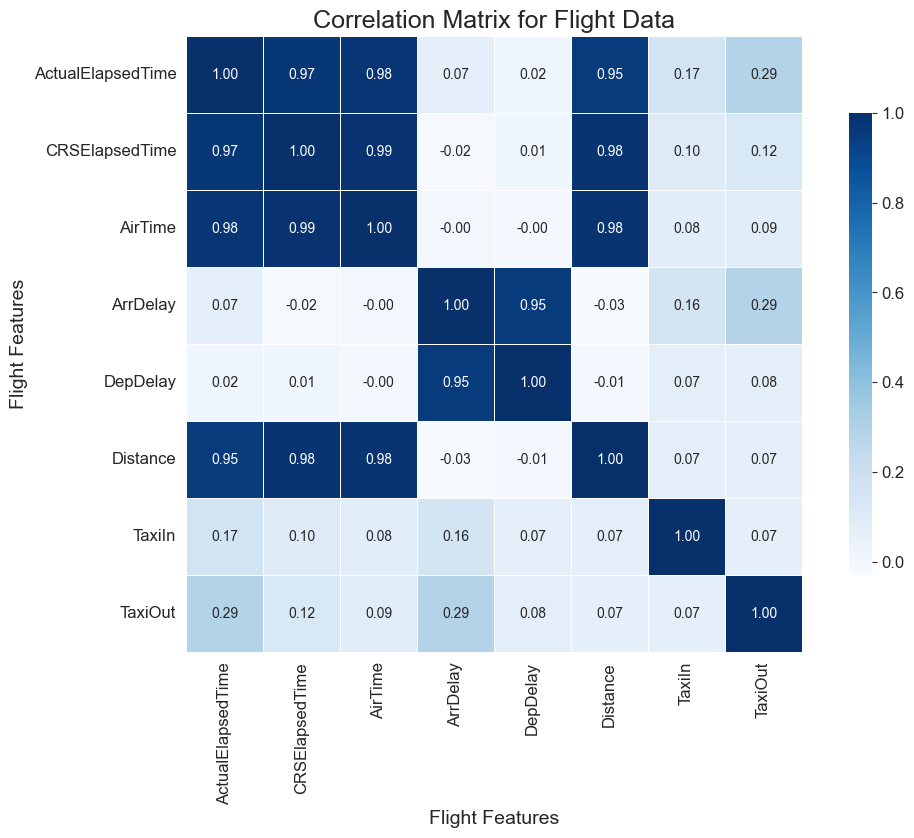

In [152]:
plt.figure(figsize=(12, 8))
corr_matrix = flight_df[['ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','DepDelay', 'Distance', 'TaxiIn', 'TaxiOut']].corr()

# Define heatmap color map and annotations
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', square=True, linewidths=0.5, cbar_kws={'shrink': 0.75})

# Set title and axis labels
plt.title('Correlation Matrix for Flight Data', fontsize=18)
plt.xlabel('Flight Features', fontsize=14)
plt.ylabel('Flight Features', fontsize=14)

# Show the plot
plt.show()

- ActualElapsedTime, CRSElapsedTime, and AirTime have high positive correlation coefficients with each other, indicating that they are strongly correlated.
- Distance has a high positive correlation with ActualElapsedTime, CRSElapsedTime, and AirTime, which makes sense since these variables are all related to flight duration.
- ArrDelay and DepDelay have moderate positive correlations with ActualElapsedTime, CRSElapsedTime, and AirTime, indicating that flights with longer durations are more likely to experience delays.
- ArrDelay and DepDelay have high positive correlations with each other, indicating that they are strongly correlated.
- TaxiIn and TaxiOut have low positive correlations with the other variables, indicating that they are weakly correlated with the other variables in the dataset.

In [156]:
#NAS DELAY
#Having more than 300 airports on the flight_dfset, we are going to focus on the top 20

Top20airports = flight_df[(flight_df.Origin == 'ORD') | (flight_df.Origin == 'ATL') |
                               (flight_df.Origin == 'flight_dfW') | (flight_df.Origin == 'DEN') |
                               (flight_df.Origin == 'EWR') | (flight_df.Origin == 'LAX') | 
                               (flight_df.Origin == 'IAH') | (flight_df.Origin == 'PHX') |
                               (flight_df.Origin == 'DTW') | (flight_df.Origin == 'SFO') | 
                               (flight_df.Origin == 'LAS') | (flight_df.Origin == 'DEN') |
                               (flight_df.Origin == 'ORD') | (flight_df.Origin == 'JFK') | 
                               (flight_df.Origin == 'CLT') | (flight_df.Origin == 'LGA') |
                               (flight_df.Origin == 'MCO') | (flight_df.Origin == 'MSP') | 
                               (flight_df.Origin == 'BOS') | (flight_df.Origin == 'PHL')]

print(Top20airports['Origin'].value_counts())

ATL    131613
ORD    125979
DEN     74323
LAX     58772
IAH     56847
PHX     55720
LAS     53710
EWR     52925
DTW     43923
SFO     43801
MCO     36139
CLT     35055
JFK     34706
MSP     32436
LGA     31185
PHL     30316
BOS     28196
Name: Origin, dtype: int64
